# Data exploration

In this notebook, we review the dataset to understand what the data represent and the relationship between data elements. This also includes dealing with the null values and defining the preprocessing function.


### Import statements

In [1164]:
pip install --upgrade seaborn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.2.2 -> 23.3.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1165]:
pip install prettytable

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.2.2 -> 23.3.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1166]:
# Import statements 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.preprocessing import LabelEncoder

### 1° Loading the dataset

In [1167]:
filepath = '../../RFQ_Data_Challenge_HEC.csv'
df = pd.read_csv(filepath)
df.head()

/var/folders/h7/_dgsjjs93hv7lr5ql2ffz2_c0000gn/T/ipykernel_71306/1895652701.py:2: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Deal_Date          ISIN      cusip              Instrument  \
0  2022-09-15  DE000A14J587  D8397TBT2   TKAGR 25/2/2025 2.500   
1  2022-09-15  DE000A14J587  D8397TBT2   TKAGR 25/2/2025 2.500   
2  2022-09-15  DE000A14J587  D8397TBT2   TKAGR 25/2/2025 2.500   
3  2022-09-15  DE000A14J587  D8397TBT2  TKAGR 2.5% 25 FEB 2025   
4  2022-09-15  DE000A14J587  D8397TBT2  TKAGR 2.5% 25 FEB 2025   

         Sales_Name Sales_Initial     company_short_name B_Price  \
0   Blanca Tailpied           BLA            Bnp Reunion     0.0   
1   Blanca Tailpied           BLA               Cegi Ett     0.0   
2   Blanca Tailpied           BLA                    Qbe     0.0   
3   Blanca Tailpied           BLA               Cegi Ett     0.0   
4  Constantin Durie           CON  Scp Laureau-Jeannerot     0.0   

         B_Side Total_Requested_Volume  ...   MidYTM  YTWDate  \
0  NATIXIS SELL                  77551  ...  5.57551      NaN   
1  NATIXIS SELL                   8163  ...  5.57551      NaN   
2  NATIXIS SELL                  20408  ...  5.57551      NaN   
3  NATIXIS SELL                  16327  ...  5.57551      NaN   
4  NATIXIS SELL                 244898  ...  5.57551      NaN   

   SpreadvsBenchmarkMid MidASWSpread  MidZSpread  GSpreadMid  \
0            417.014771   286.230682  295.597916  430.414978   
1            417.014771   286.230682  295.597916  430.414978   
2            417.014771   286.230682  295.597916  430.414978   
3            417.014771   286.230682  295.597916  430.414978   
4            417.014771   286.230682  295.597916  430.414978   

  MidModifiedDuration MidConvexity MidEffectiveDuration MidEffectiveConvexity  
0             2.23491      8.41587              2.11347               6.82874  
1             2.23491      8.41587              2.11347               6.82874  
2             2.23491      8.41587              2.11347               6.82874  
3             2.23491      8.41587              2.11347               6.82874  
4             2.23491      8.41587              2.11347               6.82874  

[5 rows x 44 columns]

In [1168]:
df.ISIN.value_counts()

ISIN
IT0003934657    8582
IT0005441883    4595
IT0005425233    4396
FR0014001NN8    4320
IT0005518128    4191
                ... 
USU2920CAA19       1
XS1637404275       1
XS2078642183       1
US91282CEX56       1
DE000SHFM683       1
Name: count, Length: 9635, dtype: int64

In [1169]:
df.maturity

0         2025-02-25 00:00:00.000
1         2025-02-25 00:00:00.000
2         2025-02-25 00:00:00.000
3         2025-02-25 00:00:00.000
4         2025-02-25 00:00:00.000
                   ...           
635450    2026-04-13 00:00:00.000
635451    2025-01-31 00:00:00.000
635452    2024-07-05 00:00:00.000
635453                       EMEA
635454                     FRANCE
Name: maturity, Length: 635455, dtype: object

In [1170]:
df.Maturity

0         02/25/2025 00:00:00
1         02/25/2025 00:00:00
2         02/25/2025 00:00:00
3         02/25/2025 00:00:00
4         02/25/2025 00:00:00
                 ...         
635450    04/13/2027 00:00:00
635451    01/31/2025 00:00:00
635452    10/05/2024 00:00:00
635453    03/21/2082 00:00:00
635454    11/28/2025 00:00:00
Name: Maturity, Length: 635455, dtype: object

### 2° Defining the preprocessing function

In [1171]:
df.columns

Index(['Deal_Date', 'ISIN', 'cusip', 'Instrument', 'Sales_Name',
       'Sales_Initial', 'company_short_name', 'B_Price', 'B_Side',
       'Total_Requested_Volume', 'Total_Traded_Volume_Natixis',
       'Total_Traded_Volume_Away', 'Total_Traded_Volume',
       'BloomIndustrySector', 'BloomIndustryGroup', 'BloomIndustrySubGroup',
       'cdcissuerShortName', 'cdcissuer', 'Country', 'lb_Platform_2',
       'maturity', 'Rating_Fitch', 'Rating_Moodys', 'Rating_SP', 'Cusip',
       'Ccy', 'Classification', 'Tier', 'Maturity', 'AssumedMaturity',
       'Coupon', 'Frequency', 'Type', 'MidPrice', 'MidYTM', 'YTWDate',
       'SpreadvsBenchmarkMid', 'MidASWSpread', 'MidZSpread', 'GSpreadMid',
       'MidModifiedDuration', 'MidConvexity', 'MidEffectiveDuration',
       'MidEffectiveConvexity'],
      dtype='object')

In [1172]:
df.dtypes

Deal_Date                       object
ISIN                            object
cusip                           object
Instrument                      object
Sales_Name                      object
Sales_Initial                   object
company_short_name              object
B_Price                         object
B_Side                          object
Total_Requested_Volume          object
Total_Traded_Volume_Natixis    float64
Total_Traded_Volume_Away       float64
Total_Traded_Volume            float64
BloomIndustrySector             object
BloomIndustryGroup              object
BloomIndustrySubGroup           object
cdcissuerShortName              object
cdcissuer                       object
Country                         object
lb_Platform_2                   object
maturity                        object
Rating_Fitch                    object
Rating_Moodys                   object
Rating_SP                       object
Cusip                           object
Ccy                      

Insights on some features :
- **Deal_Date** : The date on which a financial deal is executed. Needs to be converteted in datetime.
- **ISIN** : International Securities Identification Number, a unique identifier for Financial instruments.
- **company_short_name** : the name of the issuer of the financial instrument. It corresponds to the client name.
- **B_price** : The bid price of the financial instrument. To be converted to int (object for the moment)
- **B_side** : Natixis's position as a buyer or seller of the financial instrument (for the moment 'NATIXIS SELL' or 'NATIXIS BUY'). Contient 8 valeurs nulles.
- **Total_Requested_Volume** : The requested volume for buying or selling the financial instrument. It needs to be converted into a numerical column (object for the moment). Contient 2 valeurs nulles.
- **Total_Traded_Volume_Natixis** : The volume of the financial instrument traded by Natixis. Already good data type.
- **Total_Traded_Volume_Away** : The volume of the financial instrument traded by other banks. Already good data type.
- **Total_Traded_Volume** : The total volume of the financial instrument traded. Already good data type.
- **BloomIndustrySector**, **BloomIndustryGroup**,**BloomIndustrySubGroup**
- **maturity** : The length of time during which interest is paid. Some null values are marked as NaT. We convert this column into Datetime type. Some maturities go back to 1900, it is not possible. We delete those.
- **Rating_Fitch** : The credit rating of the financial instrument from Fitch Ratings.
- **Rating_Moodys** : The credit rating of the financial instrument from Moody's.
- **Rating_SP** : The credit rating of the financial instrument from S&P Global Ratings.
- **Ccy** : The currency in which the financial instrument is denominated.
- **Classification** : The activity sector of the company.
- **Tier** : The seniority level of the financial instrument. Lots of null value, we replace them by UNKOWN (627100 values)
- **AssumedMaturity** : The assumed maturity date of the financial instrument. Also contains a lot of null values, we replace them by maturity values (the null values only).
- **Coupon** : The interest rate of the financial instrument. Already a float.
- **Frequency** : The frequency of interest payments on the financial instrument. Takes values 1M, 3M, 6M, 12M. We delete the 'M' and convert the value into int.
- **Type** : The type of interest rate on the financial instrument (fixed or variable).
- **MidYTM** : The yield to maturity on the prime bid. Already a float.
- **MidYTM** : The yield to maturity on the prime bid. Already a float.
- **YTWDate** : Yield to Worst - The yield on the first possible redemption date. 
- **SpreadvsBenchmarkMid** : The spread of the financial instrument versus the interpolated government bond curve.
- **MidASWSpread** : The spread of the financial instrument versus the swap curve.
- **MidZSpread** : The spread of the financial instrument versus the zero- coupon curve.
- **GSpreadMid** : The spread of the financial instrument versus the interpolated government bond curve.
- **MidModifiedDuration** : The modified duration of the financial instrument. 
- **MidConvexity** : The convexity of the financial instrument.
- **MidEffectiveDuration** : The effective duration of the financial instrument.
- **MidEffectiveConvexity** : The effective convexity of the financial instrument.

Features that can be deleted at first : 
- **Cusip**, same as **cusip** but with more null values 
- **Maturity**, same as **maturity**

Added columns :
- Year, month, day of deal_date
- Year, month, day of maturity
- days to maturity

In [1059]:
# Null values analysis for columns with null values below 15000
below_threshold = df.isnull().sum().sort_values(ascending=False) < 15000
print("Columns with null values below 15000:")
print(below_threshold[below_threshold].index)

# Null values analysis for columns with null values above 15000
above_threshold = df.isnull().sum().sort_values(ascending=False) >= 15000
print("\nColumns with null values above or equal to 15000:")
print(above_threshold[above_threshold].index)


Columns with null values below 15000:
Index(['Sales_Initial', 'Sales_Name', 'MidYTM', 'Coupon', 'Ccy',
       'BloomIndustryGroup', 'BloomIndustrySector', 'Instrument', 'cusip',
       'maturity', 'cdcissuerShortName', 'Frequency', 'MidPrice', 'cdcissuer',
       'company_short_name', 'BloomIndustrySubGroup', 'B_Price',
       'Classification', 'Total_Traded_Volume_Natixis', 'B_Side',
       'Total_Traded_Volume_Away', 'Total_Requested_Volume',
       'Total_Traded_Volume', 'Type', 'Maturity', 'ISIN', 'Deal_Date'],
      dtype='object')

Columns with null values above or equal to 15000:
Index(['Tier', 'AssumedMaturity', 'YTWDate', 'GSpreadMid',
       'SpreadvsBenchmarkMid', 'Cusip', 'MidEffectiveConvexity',
       'MidEffectiveDuration', 'MidASWSpread', 'Rating_Moodys', 'MidConvexity',
       'Rating_Fitch', 'MidZSpread', 'Rating_SP', 'MidModifiedDuration',
       'Country', 'lb_Platform_2'],
      dtype='object')


In [1173]:
def preprocess_dataframe(df):
    """
    Preprocesses the input DataFrame with the following steps:
    1. Converts 'Deal_Date', 'maturity', 'AssumedMaturity', 'YTWDate' columns to datetime.
    2. Converts 'B_Side' column to boolean (1 for 'NATIXIS BUY', 0 for 'NATIXIS SELL').
    3. Converts 'B_Price' and 'Total_Requested_Volume' columns to integers.
    4. Fills null values in 'Tier', 'AssumedMaturity', and 'YTWDate' columns with 'UNKNOWN'.
    5. Converts 'Frequency' feature values into integers (removing 'M' from the end).
    6. Drops the unsused 'Cusip' column.

    Parameters:
    - df (DataFrame): Input DataFrame.

    Returns:
    - DataFrame: Processed DataFrame.
    """

    df = df.copy()

    # Drop null values only for columns below the threshold
    columns_to_delete_null_vales = ['MidYTM', 'Coupon', 'Ccy', 'cusip',
       'maturity', 'cdcissuerShortName', 'Frequency', 'MidPrice', 'cdcissuer',
       'company_short_name', 'BloomIndustrySubGroup', 'B_Price',
       'Total_Traded_Volume_Natixis', 'B_Side',
       'Total_Traded_Volume_Away', 'Total_Requested_Volume',
       'Total_Traded_Volume', 'Type', 'Maturity', 'ISIN', 'Deal_Date']
    df = df.dropna(subset=columns_to_delete_null_vales)

    # Convert 'B_Price', 'Total_Requested_Volume', 'Frequency' to integers
    df['Frequency'] = df['Frequency'].str.replace('M', '')
    numerical_columns = ['B_Price', 'Total_Requested_Volume', 'Frequency']
    df.dropna(subset=numerical_columns, inplace=True)
    for column in numerical_columns:
        df[column] = pd.to_numeric(df[column], errors='coerce').astype(int)

    # Fix the error in the B_Price column
    df = df[df['B_Price'] >= 20]

    # Replace NaT with null values in the 'Maturity' column
    df['maturity'].replace({pd.NaT: np.nan}, inplace=True)

    # Convert 'Deal_Date', 'maturity', 'AssumedMaturity', 'YTWDate' to datetime
    df['Deal_Date'] = pd.to_datetime(df['Deal_Date'])
    df['maturity'] = pd.to_datetime(df['maturity'], errors='coerce',  format='%Y-%m-%d %H:%M:%S.%f')
    df['AssumedMaturity'] = pd.to_datetime(df['AssumedMaturity'], errors='coerce')
    df['YTWDate'] = pd.to_datetime(df['YTWDate'], errors='coerce')

    # Add year, month, day for clustering 
    df['Year_dealdate'] = df['Deal_Date'].dt.year
    df['Month_dealdate'] = df['Deal_Date'].dt.month
    df['Day_dealdate'] = df['Deal_Date'].dt.day
    df['Year_maturity'] = df['maturity'].dt.year
    df['Month_maturity'] = df['maturity'].dt.month
    df['Day_maturity'] = df['maturity'].dt.day

    # Delete maturities smaller than 2021 (as deal dates starts in 2021)
    df = df[df['maturity'].dt.year >= 2021]

    # Compute number of days between maturity and deal date
    df['Days_to_Maturity'] = (df['maturity'] - df['Deal_Date']).dt.days

    # Replace null values in 'AssumedMaturity' with values from 'Maturity'
    df['AssumedMaturity'] = df['AssumedMaturity'].fillna(df['Maturity'])

    # Convert 'B_Side' column to boolean (1 for 'NATIXIS BUY', 0 for 'NATIXIS SELL')
    df = df[df['B_Side'].isin(['NATIXIS SELL', 'NATIXIS BUY'])]
    df['B_Side'] = df['B_Side'].replace({'NATIXIS BUY': 1, 'NATIXIS SELL': 0})

    # Convert null values of 'Tier'
    df['Tier'].fillna('UNKNOWN', inplace=True)

    # Lower string names 
    df['Sales_Name'] = df['Sales_Name'].str.lower()
    df['company_short_name'] = df['company_short_name'].str.lower()

    # Clean Ratings 
    df['Rating_Moodys'] = df['Rating_Moodys'].str.replace('(P)', '')

    # Drop unused columns
    columns_to_drop = ['Cusip', 'Maturity']
    df.drop(columns=columns_to_drop, inplace=True)

    return df

In [1174]:
df_preprocessed = preprocess_dataframe(df)
df_preprocessed.head()

Deal_Date          ISIN      cusip                Instrument  \
6  2022-11-10  NL0011220108  EK8199722  NETHER 0.25% 15 JUL 2025   
7  2022-11-10  NL0011220108  EK8199722  NETHER 0.25% 15 JUL 2025   
8  2022-11-10  NL0011220108  EK8199722  NETHER 0.25% 15 JUL 2025   
9  2022-11-10  NL0011220108  EK8199722  NETHER 0.25% 15 JUL 2025   
12 2023-10-18  IT0005530032  ZM3378175    BTPS 4.45% 01 SEP 2043   

         Sales_Name Sales_Initial           company_short_name  B_Price  \
6    heddy kerneves           HED  banque populaire de l'ouest       95   
7      ian prechais           IAN         license de transport       95   
8      ian prechais           IAN             bp val de france       95   
9   elisene arslane           ELI                         hsbc       95   
12     ian prechais           IAN         societe generale mer       92   

    B_Side  Total_Requested_Volume  ...  MidConvexity  MidEffectiveDuration  \
6        1                   13061  ...     10.181840               2.47743   
7        0                     136  ...     10.181840               2.47743   
8        0                 1224490  ...     10.181840               2.47743   
9        0                   91837  ...     10.181840               2.47743   
12       0                    2041  ...    212.362656              11.40296   

    MidEffectiveConvexity Year_dealdate Month_dealdate Day_dealdate  \
6                8.883440          2022             11           10   
7                8.883440          2022             11           10   
8                8.883440          2022             11           10   
9                8.883440          2022             11           10   
12             192.445251          2023             10           18   

   Year_maturity Month_maturity Day_maturity Days_to_Maturity  
6         2025.0            7.0         15.0              978  
7         2025.0            7.0         15.0              978  
8         2025.0            7.0         15.0              978  
9         2025.0            7.0         15.0              978  
12        2043.0            9.0          1.0             7258  

[5 rows x 49 columns]

In [1175]:
df_preprocessed.shape

(314718, 49)

Once we've corrected the B_price error, which sometimes corresponds to yield values (by setting a minimum value of 20), only 314718 lines remain.

In [1291]:
columns_to_select = ['ISIN', 'Deal_Date', 'Classification',  'BloomIndustrySector', 'BloomIndustryGroup',
                     'SpreadvsBenchmarkMid', 'MidASWSpread', 'MidZSpread', 'GSpreadMid', 
                     'MidModifiedDuration', 'MidConvexity', 'MidEffectiveDuration', 'MidEffectiveConvexity',
                     'Year_dealdate', 'Month_dealdate']
df_nan_completition = df_preprocessed[columns_to_select]
df_nan_completition = df_nan_completition.groupby('ISIN').first()
df_nan_completition.sort_values(by='Deal_Date', inplace=True)
df_nan_completition.head()

Deal_Date Classification BloomIndustrySector  \
ISIN                                                         
XS2379486884 2021-09-16     Financials           Financial   
XS1751178499 2021-09-17     Financials           Financial   
XS1165659514 2021-09-29     Financials           Financial   
US91282CCJ80 2021-10-12     Government          Government   
XS2387356459 2021-10-19         Energy           Financial   

                  BloomIndustryGroup  SpreadvsBenchmarkMid  MidASWSpread  \
ISIN                                                                       
XS2379486884  Diversified Finan Serv             64.731888     52.709721   
XS1751178499             Real Estate            388.386597           NaN   
XS1165659514    Investment Companies            522.302795    533.024231   
US91282CCJ80               Sovereign                   NaN     -6.623330   
XS2387356459             Real Estate             94.000000           NaN   

              MidZSpread  GSpreadMid  MidModifiedDuration  MidConvexity  \
ISIN                                                                      
XS2379486884   53.477428   65.627258              2.89046      10.01612   
XS1751178499         NaN         NaN                  NaN           NaN   
XS1165659514  540.843811  560.354553              2.92025      11.05171   
US91282CCJ80   -6.776010         NaN              4.59350      24.98605   
XS2387356459         NaN         NaN                  NaN           NaN   

              MidEffectiveDuration  MidEffectiveConvexity  Year_dealdate  \
ISIN                                                                       
XS2379486884               2.89137               9.867520           2021   
XS1751178499                   NaN                    NaN           2021   
XS1165659514               2.89406              10.344400           2021   
US91282CCJ80               4.57088              23.565519           2021   
XS2387356459                   NaN                    NaN           2021   

              Month_dealdate  
ISIN                          
XS2379486884               9  
XS1751178499               9  
XS1165659514               9  
US91282CCJ80              10  
XS2387356459              10

In [1292]:
# Process the dataframe, Group by Classification
df_by_classification = df_nan_completition[['Classification', 
                     'SpreadvsBenchmarkMid', 'MidASWSpread', 'MidZSpread', 'GSpreadMid', 
                     'MidModifiedDuration', 'MidConvexity', 'MidEffectiveDuration', 'MidEffectiveConvexity', 'Year_dealdate', 'Month_dealdate']]
df_by_classification = df_by_classification.groupby(['Classification', 'Year_dealdate', 'Month_dealdate']).mean().reset_index()
df_by_classification['Deal_Date'] = df_by_classification['Year_dealdate'].astype(str) + '-' + df_by_classification['Month_dealdate'].astype(str) + '-01'
df_by_classification['Deal_Date'] = pd.to_datetime(df_by_classification['Deal_Date'])
df_by_classification = df_by_classification.drop(['Year_dealdate', 'Month_dealdate'], axis=1)
df_by_classification.describe()


SpreadvsBenchmarkMid  MidASWSpread  MidZSpread  GSpreadMid  \
count            201.000000    190.000000  193.000000  175.000000   
mean             122.206359     61.583862   61.511008  122.231460   
min               -8.382080   -132.381552 -112.259110  -35.965561   
25%               80.021523     15.238838   15.061349   72.856744   
50%              110.147034     54.731236   52.318185  104.058533   
75%              142.748028     90.645414   92.679970  144.605729   
max              657.461731    292.866976  332.249823  861.690491   
std               73.013684     62.720427   67.998839   86.728511   

       MidModifiedDuration  MidConvexity  MidEffectiveDuration  \
count           195.000000    193.000000            184.000000   
mean              4.255848     39.315132              3.983481   
min               0.086870      0.091020              0.093530   
25%               3.047295     14.701125              2.849346   
50%               3.913140     26.264451              3.722098   
75%               5.465648     42.240262              5.124179   
max              15.500542    341.547723             20.071662   
std               2.158207     45.005369              2.113410   

       MidEffectiveConvexity                      Deal_Date  
count           1.840000e+02                            205  
mean            6.081838e+04  2023-01-17 00:28:05.853658624  
min             1.686000e-02            2021-09-01 00:00:00  
25%             1.282072e+01            2022-09-01 00:00:00  
50%             2.355621e+01            2023-02-01 00:00:00  
75%             5.263731e+01            2023-07-01 00:00:00  
max             2.146428e+06            2023-12-01 00:00:00  
std             2.773808e+05                            NaN

In [1293]:
numeric_columns = ['SpreadvsBenchmarkMid', 'MidASWSpread', 'MidZSpread', 'GSpreadMid', 
                   'MidModifiedDuration', 'MidConvexity', 'MidEffectiveDuration', 'MidEffectiveConvexity']
summary_by_classification = df_by_classification.groupby('Classification')[numeric_columns].describe()
summary_by_classification


SpreadvsBenchmarkMid                          \
                                           count        mean         std   
Classification                                                             
Basic Materials                             18.0  130.985740   38.741915   
Consumer Goods                               6.0  146.321094   84.367240   
Consumer Services                           12.0  122.149045   51.241342   
Energy                                      21.0  102.198116   43.852918   
Financials                                  27.0  129.461855   46.004783   
Government                                  21.0   53.243947   15.444753   
Healthcare                                  13.0   78.106708   33.828940   
Industrials                                 23.0  136.806801   67.451105   
Mortgage Finance                             4.0   46.394001   47.849891   
Technology                                  19.0  140.137894   68.192780   
Telecommunications Services                 16.0  216.024952  149.071538   
Utilities                                   21.0  125.510832   35.565011   

                                                                            \
                                   min         25%         50%         75%   
Classification                                                               
Basic Materials              37.575293  116.400763  125.155142  162.432842   
Consumer Goods               80.738487   94.090364  104.828781  179.316431   
Consumer Services            32.116030   94.100056  117.964100  165.570463   
Energy                       46.850281   77.179718   96.025814  115.157234   
Financials                   84.492121  108.284315  125.238730  136.191886   
Government                   -0.268751   48.974044   54.250000   64.112479   
Healthcare                   18.822420   69.144741   80.353111   92.727001   
Industrials                  69.615623   90.864431  114.147232  168.556822   
Mortgage Finance             -8.382080   15.452920   48.060636   79.001716   
Technology                   52.732233  102.200899  122.582854  162.105908   
Telecommunications Services  62.407181  109.051341  175.792591  256.520610   
Utilities                    56.562511   95.676522  119.302211  144.022141   

                                        MidASWSpread             ...  \
                                    max        count       mean  ...   
Classification                                                   ...   
Basic Materials              211.693909         16.0  91.756522  ...   
Consumer Goods               292.873974          4.0  74.048546  ...   
Consumer Services            189.475586          9.0  61.143715  ...   
Energy                       232.281946         20.0  47.491344  ...   
Financials                   325.140427         27.0  81.439397  ...   
Government                    70.905309         25.0  -9.352479  ...   
Healthcare                   131.738461         11.0   4.901120  ...   
Industrials                  324.016449         23.0  90.066386  ...   
Mortgage Finance              97.836813          3.0  -6.330817  ...   
Technology                   351.448744         16.0  87.484211  ...   
Telecommunications Services  657.461731         15.0  96.030252  ...   
Utilities                    190.842583         21.0  72.610250  ...   

                            MidEffectiveDuration             \
                                             75%        max   
Classification                                                
Basic Materials                         4.398970   6.236427   
Consumer Goods                          5.972450   6.280830   
Consumer Services                       5.547078   7.074860   
Energy                                  3.370963   7.275300   
Financials                              3.638841   4.644220   
Government                              5.591255  20.071662   
Healthcare                              6.199278   7.787500   
Indus

In [1294]:
# Groupement par classification et année, puis calcul des statistiques sommaires
summary_by_classification_year = df_by_classification.groupby(['Classification', df_by_classification['Deal_Date'].dt.year])[numeric_columns].describe()

# Affichage des statistiques sommaires
summary_by_classification_year


SpreadvsBenchmarkMid              \
                                                     count        mean   
Classification              Deal_Date                                    
Basic Materials             2022                       7.0  142.823918   
                            2023                      11.0  123.452354   
Consumer Goods              2022                       1.0  203.728378   
                            2023                       5.0  134.839637   
Consumer Services           2021                       1.0  122.567329   
                            2022                       3.0  173.015909   
                            2023                       8.0  103.021686   
Energy                      2021                       1.0   96.025814   
                            2022                       8.0   90.616719   
                            2023                      12.0  110.433407   
Financials                  2021                       3.0  165.710849   
                            2022                      12.0  128.434098   
                            2023                      12.0  121.427364   
Government                  2021                       0.0         NaN   
                            2022                       9.0   52.355774   
                            2023                      12.0   53.910077   
Healthcare                  2022                       4.0  106.811409   
                            2023                       9.0   65.349063   
Industrials                 2021                       2.0  246.246796   
                            2022                       9.0  160.478114   
                            2023                      12.0  100.813317   
Mortgage Finance            2022                       2.0   44.727366   
                            2023                       2.0   48.060636   
Technology                  2022                       7.0  142.652067   
                            2023                      12.0  138.671293   
Telecommunications Services 2022                       5.0  294.066421   
                            2023                      11.0  180.551557   
Utilities                   2022                       9.0  130.459712   
                            2023                      12.0  121.799173   

                                                                           \
                                              std         min         25%   
Classification              Deal_Date                                       
Basic Materials             2022        41.443984   98.723389  114.346336   
                            2023        36.884983   37.575293  117.688736   
Consumer Goods              2022              NaN  203.728378  203.728378   
                            2023        88.930367   80.738487   90.928162   
Consumer Services           2021              NaN  122.567329  122.567329   
                            2022        15.647897  158.331154  164.786071   
                            2023        50.289700   32.116030   68.494199   
Energy                      2021              NaN   96.025814   96.025814   
                            2022        29.168174   46.850281   75.907500   
                            2023        52.726675   56.990220   75.306625   
Financials                  2021       138.078255   84.492121   85.996060   
                            2022        28.300176   87.155738  113.662722   
                            2023        17.469589   87.700032  109.061213   
Government                  2021              NaN         NaN         NaN   
                            2022        23.233766   -0.268751   54.185173   
                            2023         6.323986   47.423811   48.881443   
Healthcare                  2022        26.706411   69.144741   99.896461   
                            2023        29.224160   18.822420   31.978020   
Industrials                 2021       109.982898  1

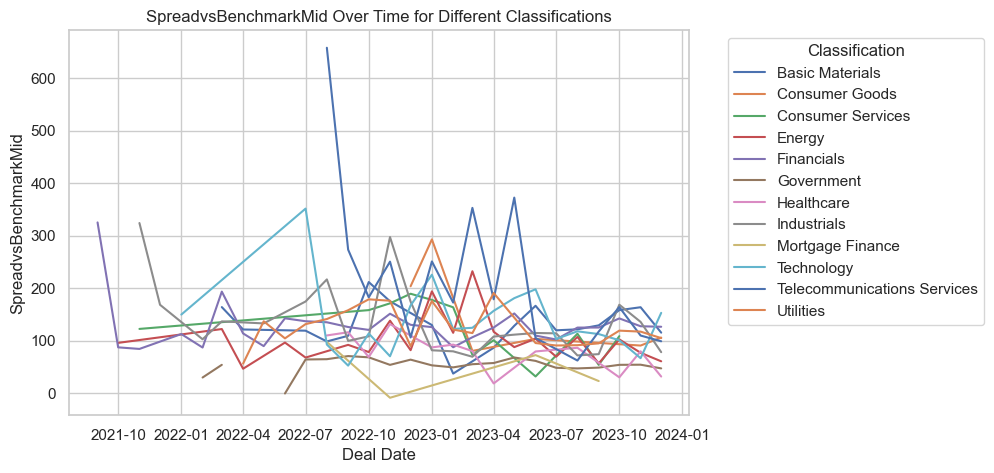

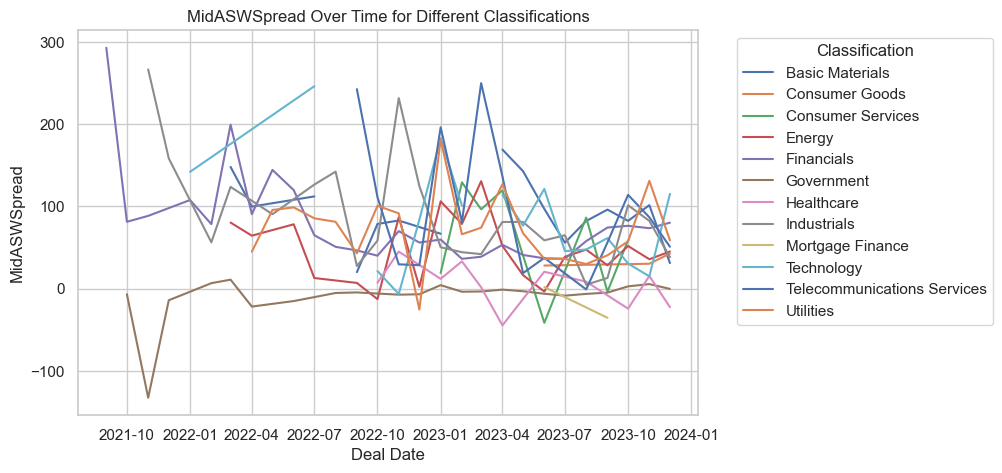

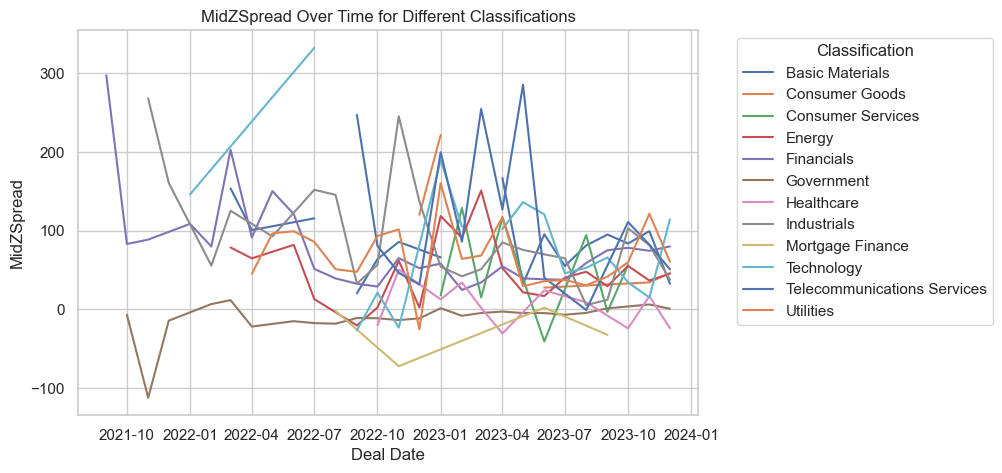

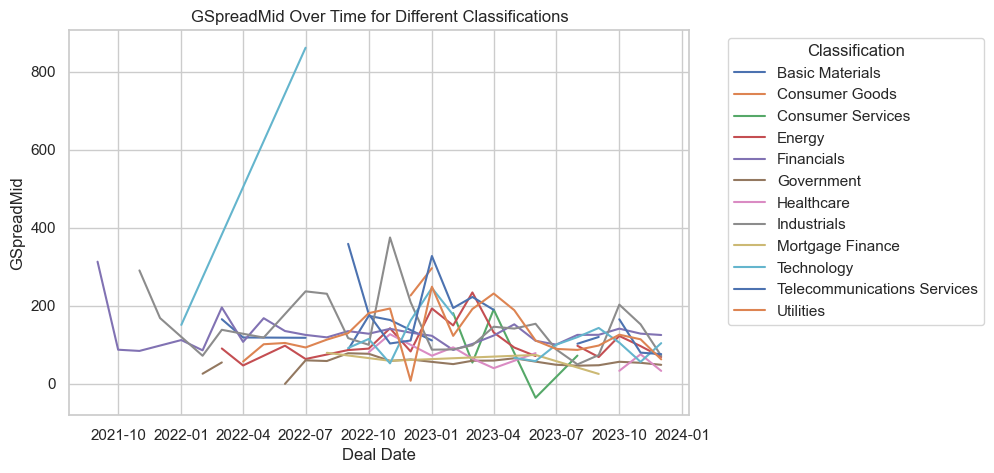

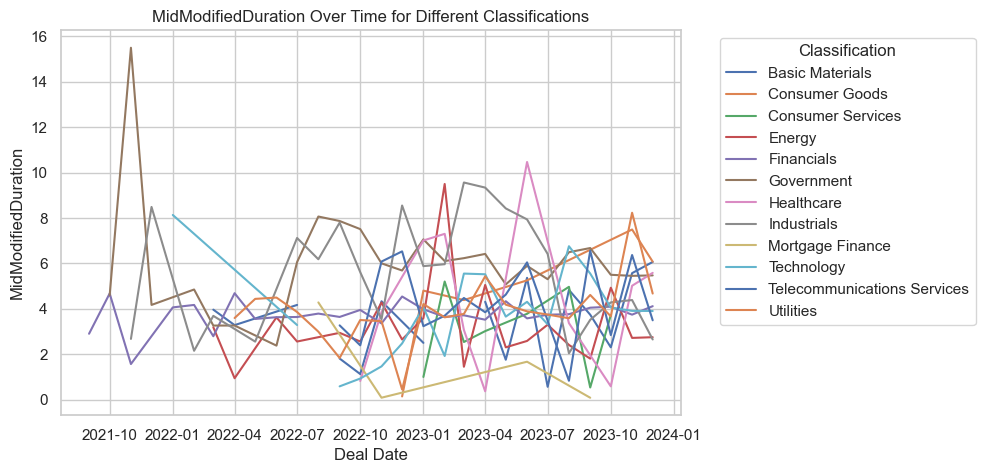

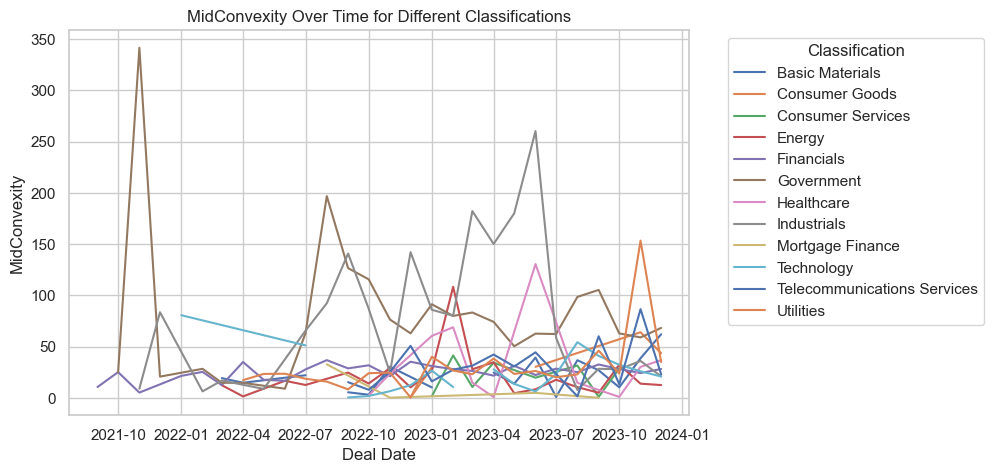

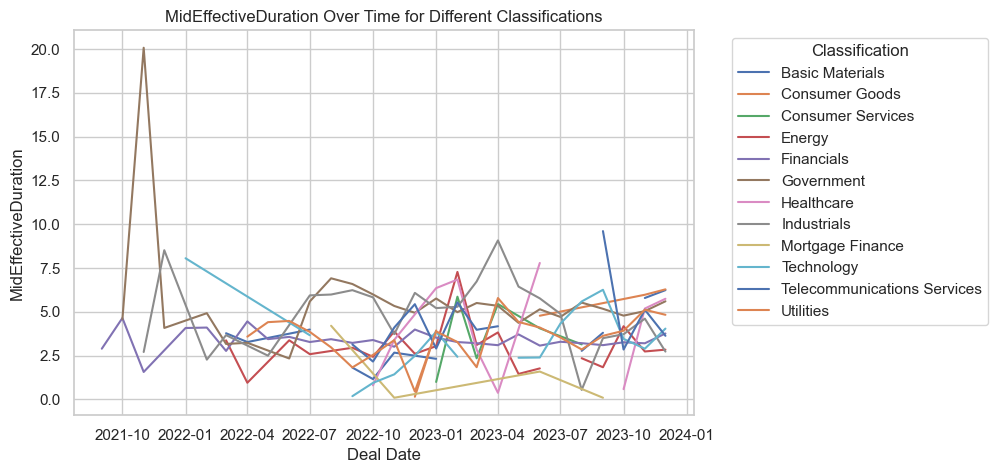

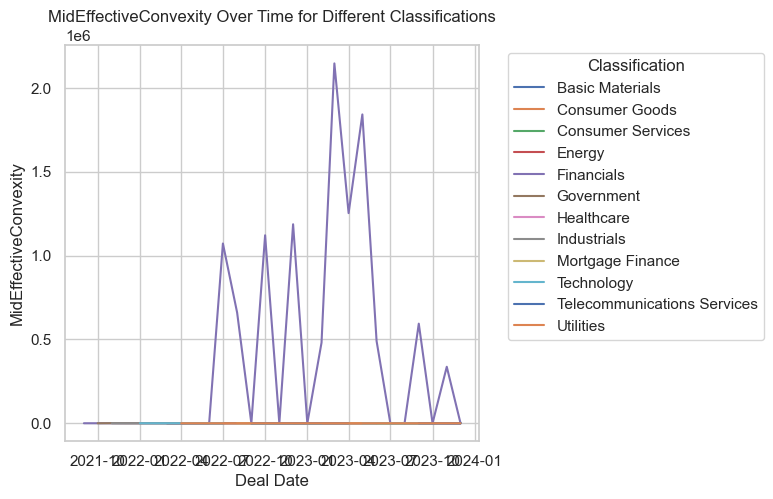

In [1282]:
# Process the dataframe
df_by_classification = df_nan_completition[['Classification', 
                     'SpreadvsBenchmarkMid', 'MidASWSpread', 'MidZSpread', 'GSpreadMid', 
                     'MidModifiedDuration', 'MidConvexity', 'MidEffectiveDuration', 'MidEffectiveConvexity', 'Year_dealdate', 'Month_dealdate']]
df_by_classification = df_by_classification.groupby(['Classification', 'Year_dealdate', 'Month_dealdate']).mean().reset_index()

df_by_classification['Deal_Date'] = df_by_classification['Year_dealdate'].astype(str) + '-' + df_by_classification['Month_dealdate'].astype(str) + '-01'
df_by_classification['Deal_Date'] = pd.to_datetime(df_by_classification['Deal_Date'])
df_by_classification = df_by_classification.drop(['Year_dealdate', 'Month_dealdate'], axis=1)

# Liste des colonnes numériques
numeric_columns = ['SpreadvsBenchmarkMid', 'MidASWSpread', 'MidZSpread', 'GSpreadMid', 
                   'MidModifiedDuration', 'MidConvexity', 'MidEffectiveDuration', 'MidEffectiveConvexity']

classifications = df_by_classification.Classification.unique()

for column in numeric_columns:
    plt.figure(figsize=(8, 5))

    for classification in classifications:
        df_filtered = df_by_classification[df_by_classification['Classification'] == classification]
        plt.plot(df_filtered['Deal_Date'], df_filtered[column], label=classification)

    plt.grid(True)
    plt.legend(title='Classification', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title(f'{column} Over Time for Different Classifications')
    plt.xlabel('Deal Date')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


In [1285]:
# Process the dataframe, group by Industry sector
df_by_industrySector = df_nan_completition[['BloomIndustrySector', 
                     'SpreadvsBenchmarkMid', 'MidASWSpread', 'MidZSpread', 'GSpreadMid', 
                     'MidModifiedDuration', 'MidConvexity', 'MidEffectiveDuration', 'MidEffectiveConvexity', 'Year_dealdate', 'Month_dealdate']]
df_by_industrySector = df_by_industrySector.groupby(['BloomIndustrySector', 'Year_dealdate', 'Month_dealdate']).mean().reset_index()
df_by_industrySector['Deal_Date'] = df_by_industrySector['Year_dealdate'].astype(str) + '-' + df_by_industrySector['Month_dealdate'].astype(str) + '-01'
df_by_industrySector['Deal_Date'] = pd.to_datetime(df_by_classification['Deal_Date'])
df_by_industrySector = df_by_industrySector.drop(['Year_dealdate', 'Month_dealdate'], axis=1)
df_by_industrySector.describe()

SpreadvsBenchmarkMid  MidASWSpread  MidZSpread  GSpreadMid  \
count            170.000000    166.000000  168.000000  155.000000   
mean             122.348435     64.733762   63.429334  124.606800   
min              -56.200001   -132.381552 -112.259110  -56.200001   
25%               86.222132     28.322823   21.897098   78.606931   
50%              115.310917     57.927165   55.060125  110.951186   
75%              137.980783     94.746252   90.991843  150.216850   
max              657.461731    292.866976  332.249823  861.690491   
std               70.761665     61.660135   63.498618   87.530907   

       MidModifiedDuration  MidConvexity  MidEffectiveDuration  \
count           169.000000    167.000000            161.000000   
mean              4.295815     39.288324              4.007937   
min               0.174680      0.348030              0.176860   
25%               3.223846     14.882395              2.967177   
50%               3.986341     26.282987              3.775820   
75%               5.353949     44.299080              4.852652   
max              15.500542    341.547723             20.071662   
std               2.028183     42.755160              2.059647   

       MidEffectiveConvexity                      Deal_Date  
count           1.610000e+02                            174  
mean            6.474997e+04  2023-01-07 13:47:35.172413696  
min             6.198000e-02            2021-09-01 00:00:00  
25%             1.412882e+01            2022-08-01 00:00:00  
50%             2.373859e+01            2023-02-01 00:00:00  
75%             5.440888e+01            2023-07-01 00:00:00  
max             2.077191e+06            2023-12-01 00:00:00  
std             2.777592e+05                            NaN

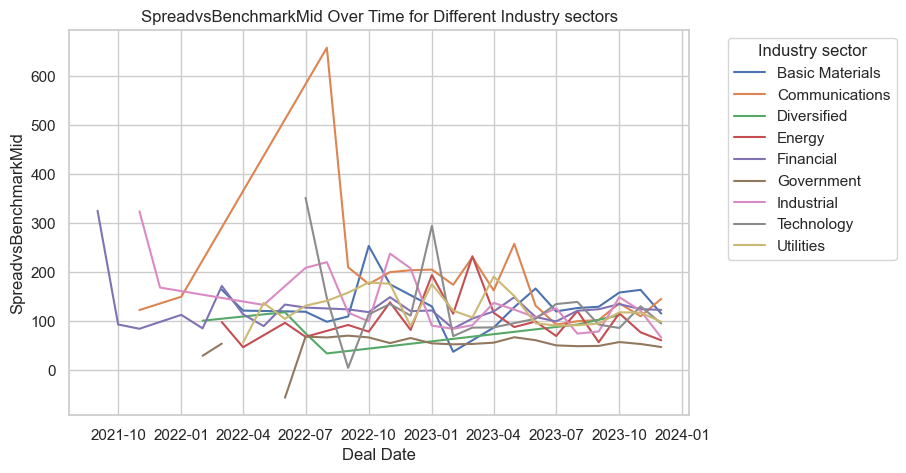

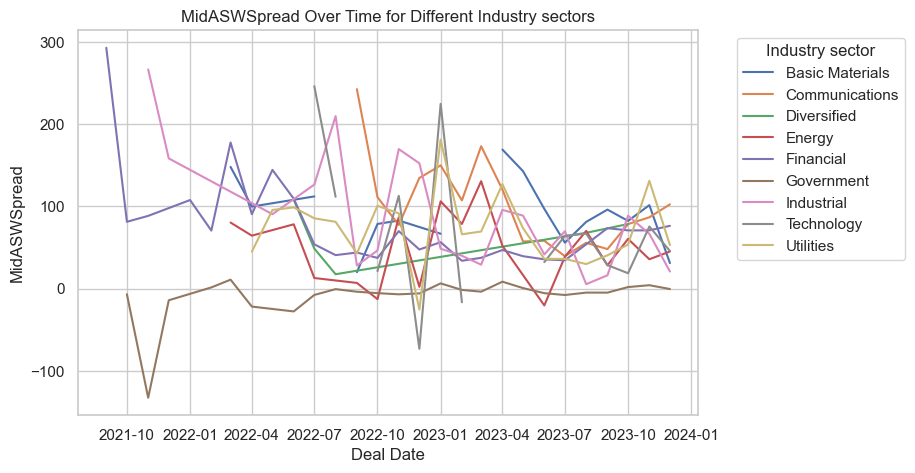

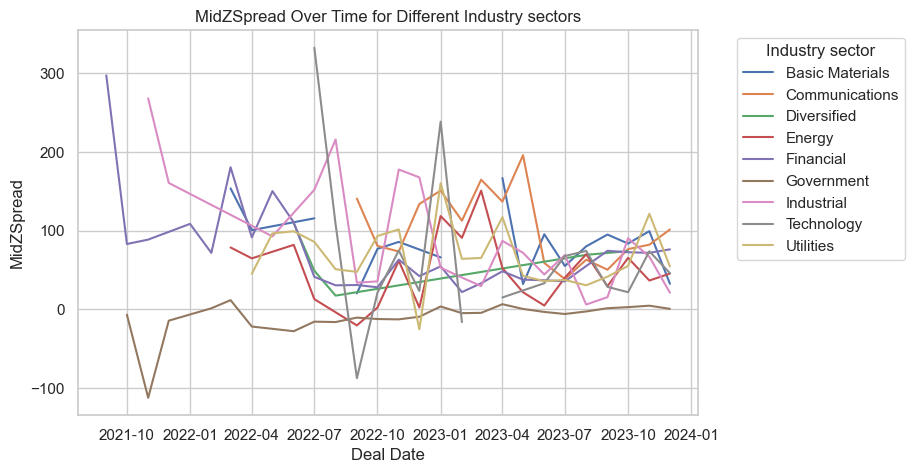

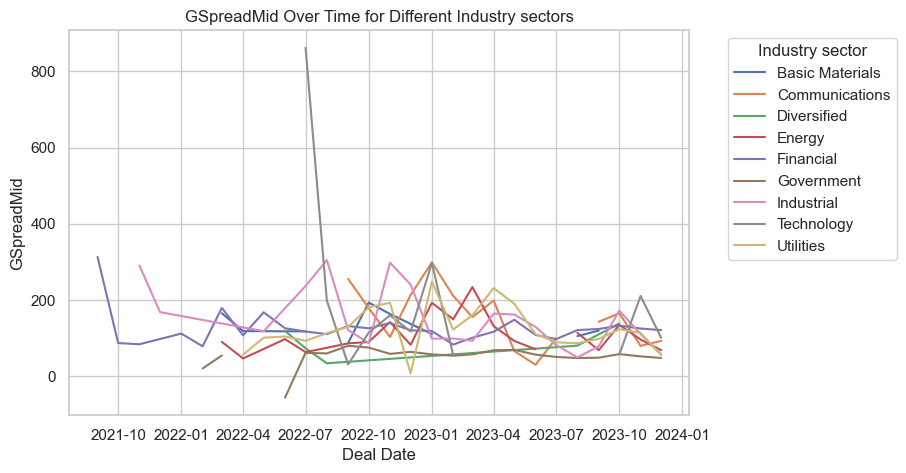

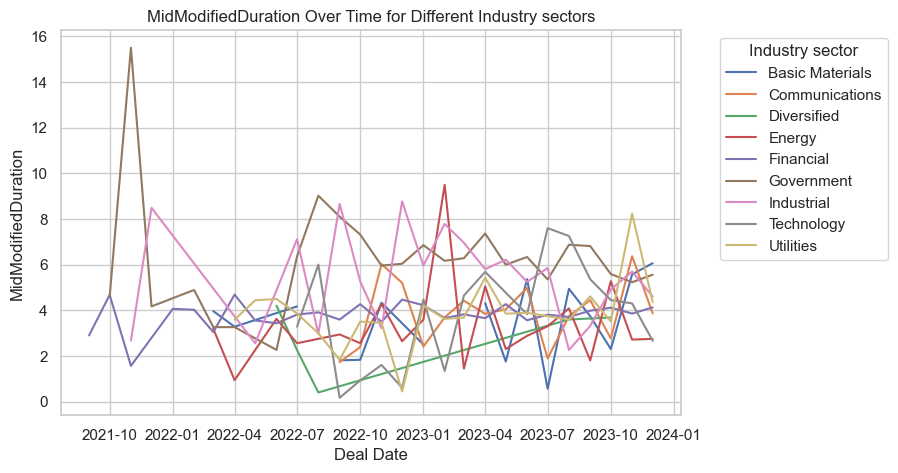

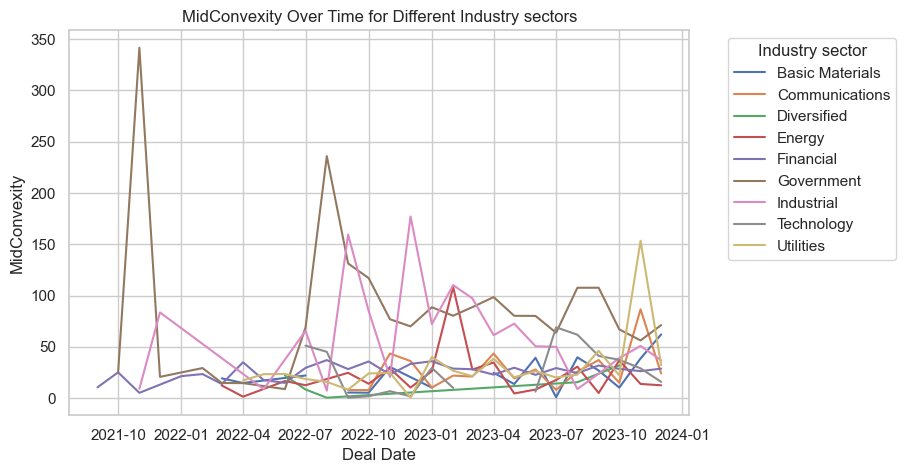

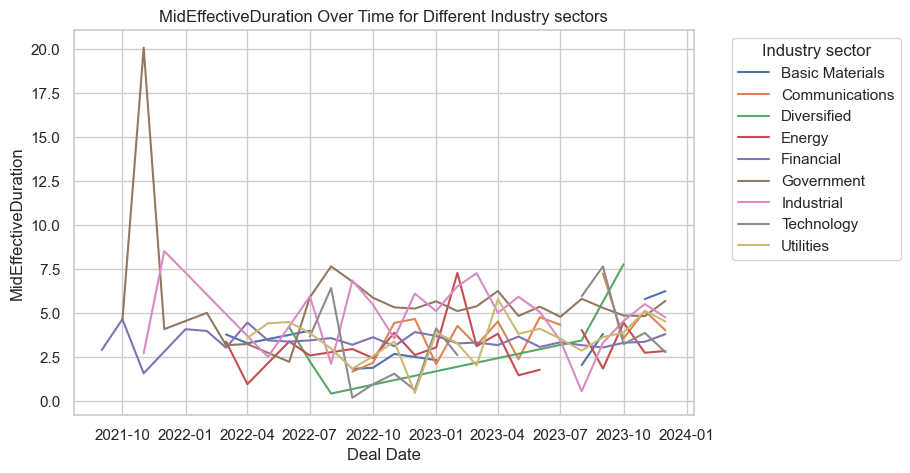

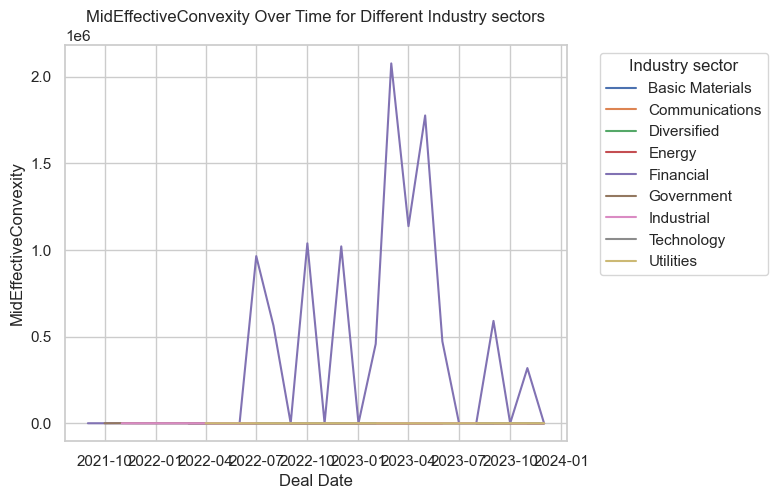

In [1287]:
# Process the dataframe
df_by_industrySector = df_nan_completition[['BloomIndustrySector', 
                     'SpreadvsBenchmarkMid', 'MidASWSpread', 'MidZSpread', 'GSpreadMid', 
                     'MidModifiedDuration', 'MidConvexity', 'MidEffectiveDuration', 'MidEffectiveConvexity', 'Year_dealdate', 'Month_dealdate']]
df_by_industrySector = df_by_industrySector.groupby(['BloomIndustrySector', 'Year_dealdate', 'Month_dealdate']).mean().reset_index()

df_by_industrySector['Deal_Date'] = df_by_industrySector['Year_dealdate'].astype(str) + '-' + df_by_industrySector['Month_dealdate'].astype(str) + '-01'
df_by_industrySector['Deal_Date'] = pd.to_datetime(df_by_industrySector['Deal_Date'])
df_by_industrySector = df_by_industrySector.drop(['Year_dealdate', 'Month_dealdate'], axis=1)

# Liste des colonnes numériques
numeric_columns = ['SpreadvsBenchmarkMid', 'MidASWSpread', 'MidZSpread', 'GSpreadMid', 
                   'MidModifiedDuration', 'MidConvexity', 'MidEffectiveDuration', 'MidEffectiveConvexity']

industries = df_by_industrySector.BloomIndustrySector.unique()

for column in numeric_columns:
    plt.figure(figsize=(8, 5))

    for industry in industries:
        df_filtered = df_by_industrySector[df_by_industrySector['BloomIndustrySector'] == industry]
        plt.plot(df_filtered['Deal_Date'], df_filtered[column], label=industry)

    plt.grid(True)
    plt.legend(title='Industry sector', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title(f'{column} Over Time for Different Industry sectors')
    plt.xlabel('Deal Date')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


In [1289]:
# Groupement par classification et année, puis calcul des statistiques sommaires
summary_by_industry_year = df_by_industrySector.groupby(['BloomIndustrySector', df_by_classification['Deal_Date'].dt.year])[numeric_columns].describe()
summary_by_industry_year


SpreadvsBenchmarkMid                          \
                                             count        mean         std   
BloomIndustrySector Deal_Date                                                
Basic Materials     2022                       7.0  148.768801   54.039967   
                    2023                      11.0  123.906738   36.893422   
Communications      2021                       1.0  122.567329         NaN   
                    2022                       6.0  266.121794  193.005618   
                    2023                      12.0  154.029788   53.771016   
Diversified         2022                       4.0   82.134871   36.546414   
                    2023                       2.0  102.676189   13.540017   
Energy              2022                       8.0   87.588335   26.543388   
                    2023                      12.0  112.264655   52.818637   
Financial           2021                       3.0  167.605474  136.498471   
                    2022                      12.0  122.714515   23.220383   
                    2023                      12.0  117.994933   16.676505   
Government          2021                       0.0         NaN         NaN   
                    2022                       9.0   46.739274   40.637961   
                    2023                      12.0   54.366269    5.597814   
Industrial          2021                       2.0  246.246796  109.982898   
                    2022                       7.0  174.882582   56.221317   
                    2023                      12.0  104.317526   26.848972   
Technology          2022                       6.0  143.846919  113.561526   
                    2023                      11.0  120.122546   62.039511   
Utilities           2022                       9.0  130.459712   40.549734   
                    2023                      12.0  121.168409   33.760764   

                                                                               \
                                      min         25%         50%         75%   
BloomIndustrySector Deal_Date                                                   
Basic Materials     2022        98.723389  114.346336  121.486378  169.585539   
                    2023        37.575293  117.688736  128.506996  144.133665   
Communications      2021       122.567329  122.567329  122.567329  122.567329   
                    2022       149.845139  181.788524  201.891388  208.388011   
                    2023        92.898707  108.028641  140.930442  181.952226   
Diversified         2022        34.155022   64.952818   88.067230  105.249283   
                    2023        93.101952   97.889071  102.676189  107.463308   
Energy              2022        46.850281   75.907500   87.180164   96.959800   
                    2023        56.990220   75.306625  107.205310  118.003388   
Financial           2021        84.492121   88.837998   93.183876  209.162151   
                    2022        85.244628  113.662722  122.193368  129.195585   
                    2023        84.777548  107.710036  121.504143  124.298814   
Government          2021              NaN         NaN         NaN         NaN   
                    2022       -56.200001   54.250000   65.574545   66.839595   
                    2023        47.235336   50.322995   53.453147   56.417112   
Industrial          2021       168.477142  207.361969  246.246796  285.131622   
                    2022        99.364907  125.286401  207.565779  214.449251   
                    2023        66.472833   83.062686   99.586289  124.316449   
Technology          2022         4.784645  111.923574  124.447396  143.765123   
                    2023        69.408665   87.022346   95.285469  132.587802   
Utilities           2022        56.562511  104.583733  137.076794  158.110606   
                    2023        91.030718   95.527706  112.460011  128.805403   

                                          MidASWSprea

In [1295]:
# Groupement par classification et année, puis calcul des statistiques sommaires
summary_by_classification_year = df_by_classification.groupby(['Classification', df_by_classification['Deal_Date'].dt.year])[numeric_columns].describe()
summary_by_classification_year


SpreadvsBenchmarkMid              \
                                                     count        mean   
Classification              Deal_Date                                    
Basic Materials             2022                       7.0  142.823918   
                            2023                      11.0  123.452354   
Consumer Goods              2022                       1.0  203.728378   
                            2023                       5.0  134.839637   
Consumer Services           2021                       1.0  122.567329   
                            2022                       3.0  173.015909   
                            2023                       8.0  103.021686   
Energy                      2021                       1.0   96.025814   
                            2022                       8.0   90.616719   
                            2023                      12.0  110.433407   
Financials                  2021                       3.0  165.710849   
                            2022                      12.0  128.434098   
                            2023                      12.0  121.427364   
Government                  2021                       0.0         NaN   
                            2022                       9.0   52.355774   
                            2023                      12.0   53.910077   
Healthcare                  2022                       4.0  106.811409   
                            2023                       9.0   65.349063   
Industrials                 2021                       2.0  246.246796   
                            2022                       9.0  160.478114   
                            2023                      12.0  100.813317   
Mortgage Finance            2022                       2.0   44.727366   
                            2023                       2.0   48.060636   
Technology                  2022                       7.0  142.652067   
                            2023                      12.0  138.671293   
Telecommunications Services 2022                       5.0  294.066421   
                            2023                      11.0  180.551557   
Utilities                   2022                       9.0  130.459712   
                            2023                      12.0  121.799173   

                                                                           \
                                              std         min         25%   
Classification              Deal_Date                                       
Basic Materials             2022        41.443984   98.723389  114.346336   
                            2023        36.884983   37.575293  117.688736   
Consumer Goods              2022              NaN  203.728378  203.728378   
                            2023        88.930367   80.738487   90.928162   
Consumer Services           2021              NaN  122.567329  122.567329   
                            2022        15.647897  158.331154  164.786071   
                            2023        50.289700   32.116030   68.494199   
Energy                      2021              NaN   96.025814   96.025814   
                            2022        29.168174   46.850281   75.907500   
                            2023        52.726675   56.990220   75.306625   
Financials                  2021       138.078255   84.492121   85.996060   
                            2022        28.300176   87.155738  113.662722   
                            2023        17.469589   87.700032  109.061213   
Government                  2021              NaN         NaN         NaN   
                            2022        23.233766   -0.268751   54.185173   
                            2023         6.323986   47.423811   48.881443   
Healthcare                  2022        26.706411   69.144741   99.896461   
                            2023        29.224160   18.822420   31.978020   
Industrials                 2021       109.982898  1

In [1307]:
def complete_nan_values(df):

    df_unique_isin = df.groupby('ISIN').first()
    columns = ['Classification', 'SpreadvsBenchmarkMid', 'MidASWSpread', 'MidZSpread', 'GSpreadMid', 
               'MidModifiedDuration', 'MidConvexity', 'MidEffectiveDuration', 'MidEffectiveConvexity', 'Year_dealdate', 'Month_dealdate']
    df_by_classification = df_unique_isin[columns].copy()
    df_by_classification = df_by_classification.groupby(['Classification', 'Year_dealdate']).mean().reset_index()

    df_group_by_industry = df_by_classification.groupby('Classification').mean().reset_index()
    numeric_columns = ['SpreadvsBenchmarkMid', 'MidASWSpread', 'MidZSpread', 'GSpreadMid', 
                       'MidModifiedDuration', 'MidConvexity', 'MidEffectiveDuration', 'MidEffectiveConvexity']
    
    df_by_classification['additional_column'] = df_by_classification['Classification'].astype(str) + ' - ' + df_by_classification['Year_dealdate'].astype(str)
    df['additional_column'] = df['Classification'].astype(str) + ' - ' + df['Year_dealdate'].astype(str)

    for column in numeric_columns:
        df_by_classification[column] = df_by_classification[column].fillna(df_by_classification['Classification'].map(df_group_by_industry.set_index('Classification')[column]))

    for column in numeric_columns:
        df[column] = df[column].fillna(df['additional_column'].map(df_by_classification.set_index('additional_column')[column]))

    df.drop(columns=['additional_column'], inplace=True)
    
    return df

df_preprocessed = complete_nan_values(df_preprocessed)

In [1311]:
# Null values analysis
df_preprocessed.GSpreadMid.isnull().sum()

5

### 3° Quick EDA

In [1176]:
df_preprocessed.ISIN.value_counts()

ISIN
IT0003934657    8333
IT0005441883    4212
IT0005425233    4190
FR0014001NN8    4033
IT0005518128    3980
                ... 
XS2194373077       1
XS1377237869       1
SK4120008954       1
XS2182054887       1
XS1218319702       1
Name: count, Length: 4918, dtype: int64

In [1177]:
df_preprocessed.columns

Index(['Deal_Date', 'ISIN', 'cusip', 'Instrument', 'Sales_Name',
       'Sales_Initial', 'company_short_name', 'B_Price', 'B_Side',
       'Total_Requested_Volume', 'Total_Traded_Volume_Natixis',
       'Total_Traded_Volume_Away', 'Total_Traded_Volume',
       'BloomIndustrySector', 'BloomIndustryGroup', 'BloomIndustrySubGroup',
       'cdcissuerShortName', 'cdcissuer', 'Country', 'lb_Platform_2',
       'maturity', 'Rating_Fitch', 'Rating_Moodys', 'Rating_SP', 'Ccy',
       'Classification', 'Tier', 'AssumedMaturity', 'Coupon', 'Frequency',
       'Type', 'MidPrice', 'MidYTM', 'YTWDate', 'SpreadvsBenchmarkMid',
       'MidASWSpread', 'MidZSpread', 'GSpreadMid', 'MidModifiedDuration',
       'MidConvexity', 'MidEffectiveDuration', 'MidEffectiveConvexity',
       'Year_dealdate', 'Month_dealdate', 'Day_dealdate', 'Year_maturity',
       'Month_maturity', 'Day_maturity', 'Days_to_Maturity'],
      dtype='object')

In [1178]:
df_preprocessed.company_short_name.value_counts()

company_short_name
societe generale mer                          87953
cegi ett                                      38541
credit agricole centre loire entreprises      21085
hsbc                                          14932
bnp reunion                                   10283
                                              ...  
mr jean-jacques bondroit                        127
ce idf                                           87
crcam                                            83
caisse d'epargne d'auvergne et du limousin       81
bp2l                                             45
Name: count, Length: 89, dtype: int64

In [1179]:
df_preprocessed.BloomIndustrySector.value_counts()

BloomIndustrySector
Government         289588
Financial           20728
Industrial           1170
Utilities            1073
Basic Materials       832
Communications        797
Energy                242
Technology            238
Diversified            17
Name: count, dtype: int64

In [1180]:
# Print null values
df_preprocessed.isnull().sum().sort_values(ascending=False)

YTWDate                        308252
GSpreadMid                     231918
SpreadvsBenchmarkMid           229476
lb_Platform_2                    7555
Country                          7555
MidASWSpread                     7206
Rating_SP                        4473
Rating_Fitch                     4462
Rating_Moodys                    3233
MidEffectiveConvexity            2413
MidEffectiveDuration             2409
MidConvexity                     1756
MidZSpread                       1588
MidModifiedDuration              1389
Sales_Initial                     888
Sales_Name                        888
Instrument                        788
BloomIndustrySector                33
BloomIndustryGroup                 33
Classification                      2
MidYTM                              0
Deal_Date                           0
Type                                0
Year_dealdate                       0
Month_dealdate                      0
Day_dealdate                        0
Year_maturit

We remark that some columns have more than 50% null values : YTWDate, GSpreadMid, SpreadvsBenchmarkMid.

In [1181]:
df_government = df_preprocessed[df_preprocessed['BloomIndustrySector']=='Government'].copy()
df_government = df_government[['YTWDate', 'SpreadvsBenchmarkMid', 'GSpreadMid']]
print('Number of government bonds : ', df_government.shape[0])
print('Null values in government bonds : ')
print(df_government.isnull().sum().sort_values(ascending=False))

Number of government bonds :  289588
Null values in government bonds : 
YTWDate                 289570
SpreadvsBenchmarkMid    229464
GSpreadMid              229285
dtype: int64


Of the zero values in the YTWDate column, almost 100% correspond to government bonds. One possible reason is that government bonds can be issued without an early redemption clause, meaning that there is no date on which the issuer can redeem the bond before maturity. In this case, the YTWDate column would have no significant value and could be left blank.

A. **Deal_Date analysis**

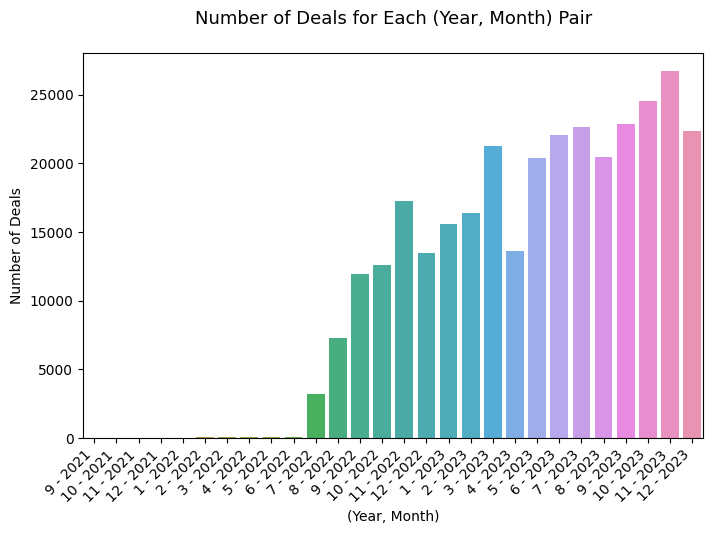

In [1182]:
# Extract year and month from 'Deal_Date'
counts_df = df_preprocessed.groupby(['Year_dealdate', 'Month_dealdate']).size().reset_index(name='Counts')
counts_df['Month_Year_dealdate'] = counts_df['Month_dealdate'].astype(str) + ' - ' + counts_df['Year_dealdate'].astype(str)

# Plot the histogram
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='Month_Year_dealdate', y='Counts', data=counts_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title('Number of Deals for Each (Year, Month) Pair\n', fontsize=13)
plt.xlabel('(Year, Month)')
plt.ylabel('Number of Deals')
plt.show()

A. **maturity analysis**

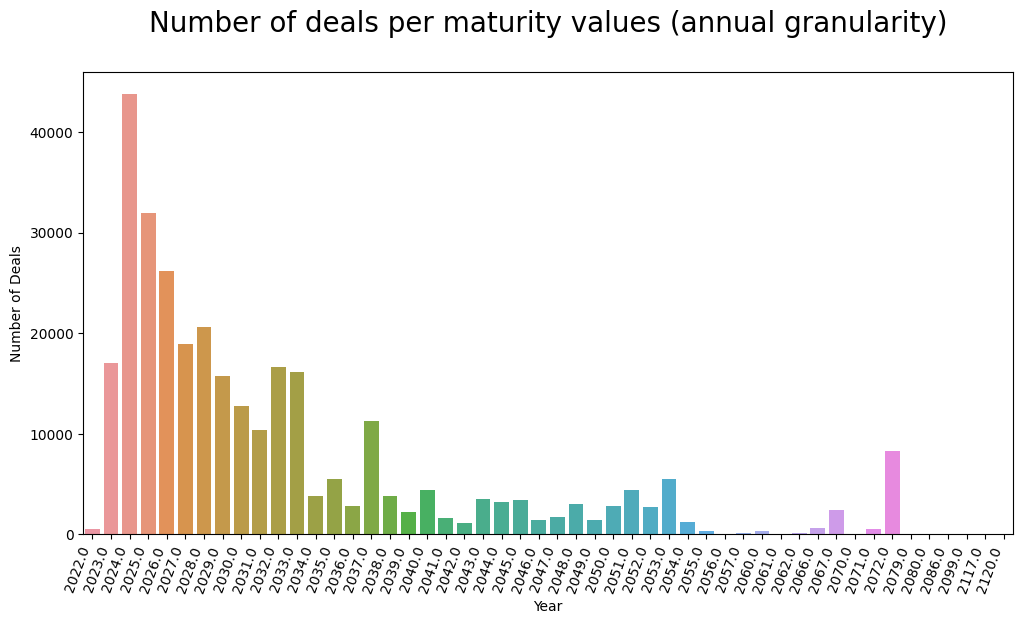

In [1183]:
df_maturity = df_preprocessed.dropna(subset=['maturity'], inplace=False)
df_maturity = df_maturity.groupby('Year_maturity').size().reset_index(name='Counts')
df_maturity.sort_values(by='Year_maturity', ascending=True)

# Plot the histogram
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Year_maturity', y='Counts', data=df_maturity)
ax.set_xticklabels(ax.get_xticklabels(), rotation=70, ha='right')
plt.title('Number of deals per maturity values (annual granularity)\n', fontsize=20)
plt.xlabel('Year')
plt.ylabel('Number of Deals')
plt.show()

C. **company_short_name analysis**

In [1184]:
number_of_comp = len(df_preprocessed.company_short_name.values)
print("Number of companies : ", number_of_comp)

Number of companies :  314718


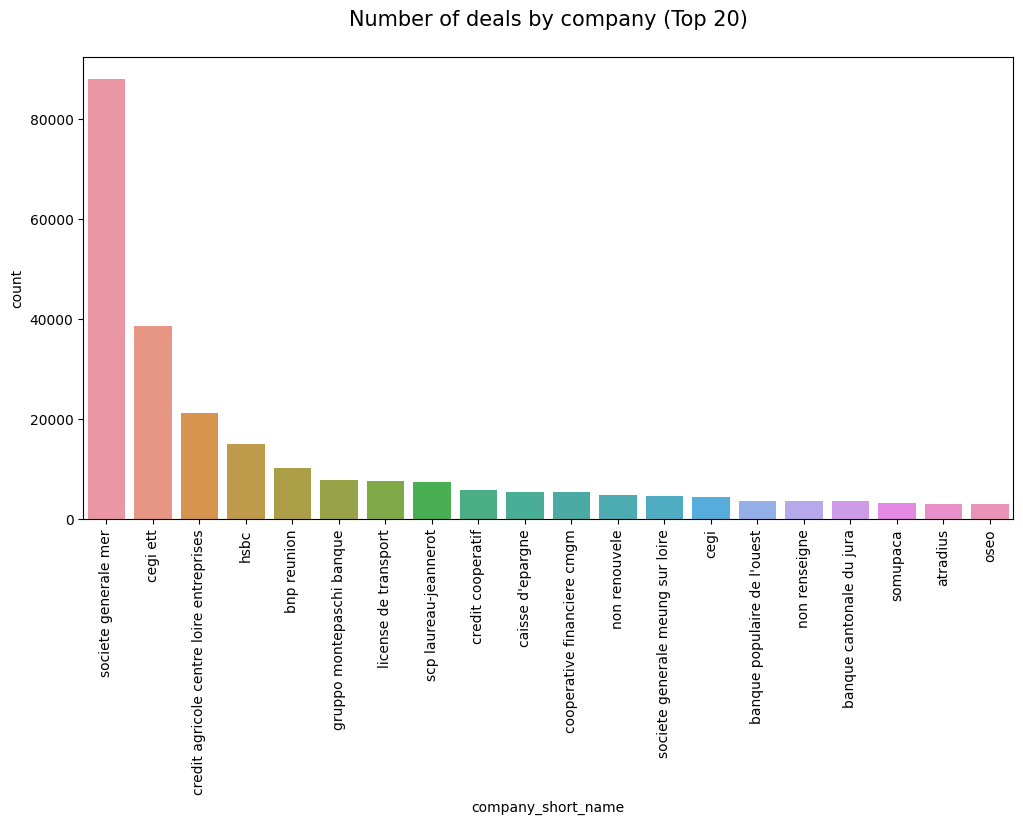

In [1185]:
# Histogramme du nombre de deals par company_short_name (top 20)
plt.figure(figsize=(12, 6))
top_20_companies = df_preprocessed['company_short_name'].value_counts().head(20)
sns.countplot(x='company_short_name', data=df_preprocessed, order=top_20_companies.index)
plt.title('Number of deals by company (Top 20)\n', fontsize=15)
plt.xticks(rotation=90)
plt.show()


D. **B_Sides analysis**

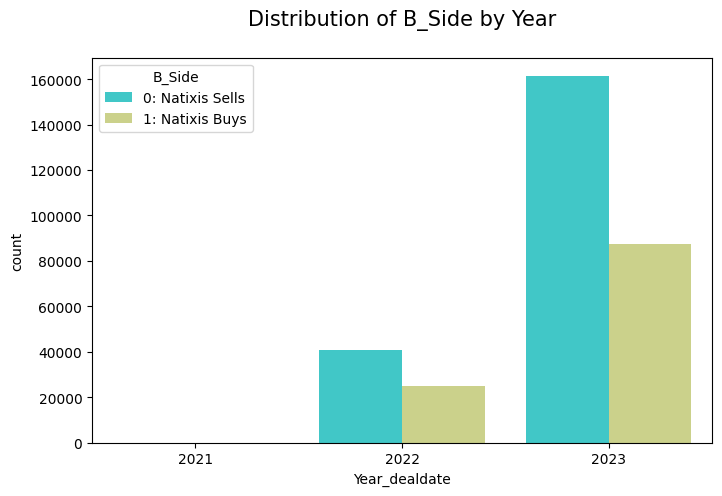

In [1186]:
plt.figure(figsize=(8, 5))
palette = sns.color_palette("rainbow", n_colors=2)
sns.countplot(x='Year_dealdate', hue='B_Side', data=df_preprocessed, palette=palette)
plt.legend(title='B_Side', labels=['0: Natixis Sells', '1: Natixis Buys'])
plt.title('Distribution of B_Side by Year\n', fontsize=15)
plt.show()

E. **BloomIndustrySector analysis**

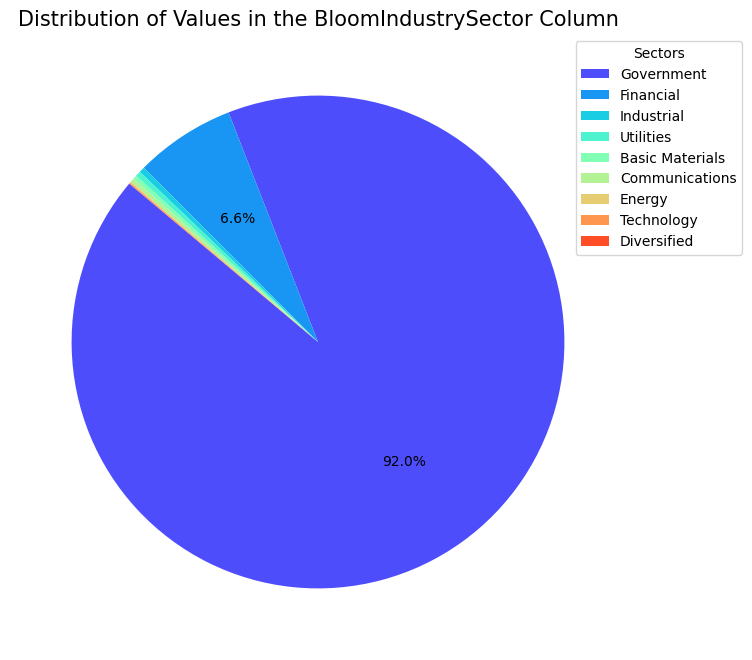

In [1187]:
sector_counts = df_preprocessed['BloomIndustrySector'].value_counts()
colors = sns.color_palette('rainbow', len(sector_counts))

# Set the threshold for displaying percentages
percentage_threshold = 2
def autopct_func(pct):
    return f'{pct:.1f}%' if pct >= percentage_threshold else ''

# Plot the pie chart without labels
plt.figure(figsize=(10, 8))
plt.pie(sector_counts, labels=None, autopct=autopct_func, startangle=140, colors=colors)
plt.legend(sector_counts.index, title='Sectors', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title('Distribution of Values in the BloomIndustrySector Column', fontsize=15)
plt.show()


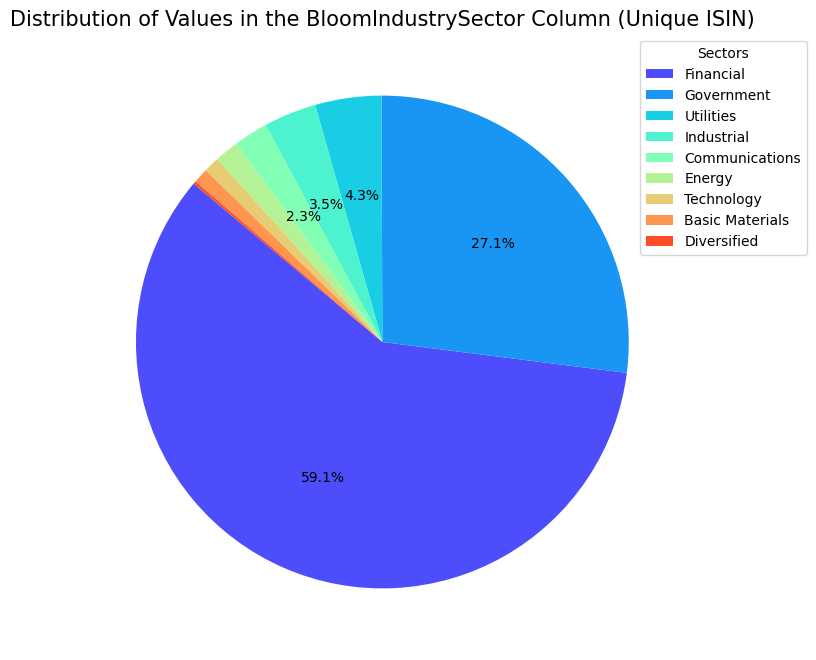

In [1188]:
# Group by unique 'ISIN' and keep the first row for each group
df_unique_isin = df_preprocessed.groupby('ISIN').first()

# Count the occurrences of each sector in the new DataFrame
sector_counts_unique_isin = df_unique_isin['BloomIndustrySector'].value_counts()

# Plot the pie chart with the new DataFrame
colors = sns.color_palette('rainbow', len(sector_counts_unique_isin))

# Set the threshold for displaying percentages
percentage_threshold = 2
def autopct_func(pct):
    return f'{pct:.1f}%' if pct >= percentage_threshold else ''

# Plot the pie chart without labels
plt.figure(figsize=(10, 8))
plt.pie(sector_counts_unique_isin, labels=None, autopct=autopct_func, startangle=140, colors=colors)
plt.legend(sector_counts_unique_isin.index, title='Sectors', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title('Distribution of Values in the BloomIndustrySector Column (Unique ISIN)', fontsize=15)
plt.show()


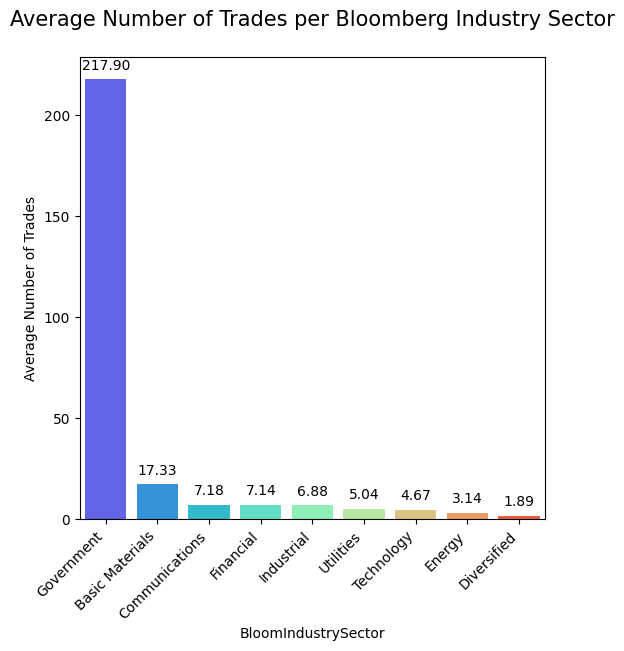

In [1189]:
df_industry = df_preprocessed[['ISIN', 'BloomIndustrySector']].copy()
df_count_trades = df_industry.groupby('ISIN').agg(Count=('BloomIndustrySector', 'count'), First_BloomIndustrySector=('BloomIndustrySector', 'first')).reset_index()
df_avg_trades_per_group = df_count_trades.groupby('First_BloomIndustrySector')['Count'].mean().reset_index()
df_avg_trades_per_group.sort_values(by='Count', ascending=False, inplace=True)

# Plot the bar chart for average number of trades per BloomIndustrySector
plt.figure(figsize=(6, 6))
ax = sns.barplot(x='First_BloomIndustrySector', y='Count', data=df_avg_trades_per_group, palette='rainbow')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Average Number of Trades per Bloomberg Industry Sector\n', fontsize=15)
plt.xlabel('BloomIndustrySector')
plt.ylabel('Average Number of Trades')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


In [1190]:
# Look at sector
df_unique_isin = df_preprocessed.groupby('ISIN').first()
sector_counts_unique_isin = df_unique_isin['BloomIndustrySector'].value_counts()
sector_counts_unique_isin


BloomIndustrySector
Financial          2903
Government         1329
Utilities           213
Industrial          170
Communications      111
Energy               77
Technology           51
Basic Materials      48
Diversified           9
Name: count, dtype: int64

In [1208]:
# Look at Industry group
number_industries = len(df_unique_isin['BloomIndustryGroup'].unique())
print('Number of industries : ', number_industries)
df_unique_isin.BloomIndustryGroup.value_counts()

Number of industries :  43


BloomIndustryGroup
Banks                       2361
Sovereign                    883
Diversified Finan Serv       347
Regional(state/provnc)       244
Multi-National               185
Electric                     173
Telecommunications            65
Oil&Gas                       62
Transportation                59
REITS                         59
Insurance                     55
Real Estate                   36
Computers                     31
Engineering&Construction      31
Internet                      29
Savings&Loans                 28
Chemicals                     27
Water                         24
Electrical Compo&Equip        19
Miscellaneous Manufactur      18
Municipal                     17
Aerospace/Defense             17
Gas                           16
Building Materials            15
Investment Companies          15
Media                         14
Software                      12
Iron/Steel                    11
Mining                        10
Pipelines               

In [1194]:
df_financial = df_unique_isin[df_unique_isin['BloomIndustrySector']=='Financial']
df_financial.BloomIndustryGroup.value_counts()

BloomIndustryGroup
Banks                     2361
Diversified Finan Serv     347
REITS                       59
Insurance                   55
Real Estate                 36
Savings&Loans               28
Investment Companies        15
Private Equity               2
Name: count, dtype: int64

In [1196]:
df_government = df_unique_isin[df_unique_isin['BloomIndustrySector']=='Government']
df_government.BloomIndustryGroup.value_counts()

BloomIndustryGroup
Sovereign                 883
Regional(state/provnc)    244
Multi-National            185
Municipal                  17
Name: count, dtype: int64

In [1197]:
df_utilities = df_unique_isin[df_unique_isin['BloomIndustrySector']=='Utilities']
df_utilities.BloomIndustryGroup.value_counts()

BloomIndustryGroup
Electric    173
Water        24
Gas          16
Name: count, dtype: int64

In [1198]:
df_industrial = df_unique_isin[df_unique_isin['BloomIndustrySector']=='Industrial']
df_industrial.BloomIndustryGroup.value_counts()

BloomIndustryGroup
Transportation              59
Engineering&Construction    31
Electrical Compo&Equip      19
Miscellaneous Manufactur    18
Aerospace/Defense           17
Building Materials          15
Environmental Control        4
Packaging&Containers         3
Machinery-Constr&Mining      2
Trucking&Leasing             1
Shipbuilding                 1
Name: count, dtype: int64

In [1200]:
df_communication = df_unique_isin[df_unique_isin['BloomIndustrySector']=='Communications']
df_communication.BloomIndustryGroup.value_counts()

BloomIndustryGroup
Telecommunications    65
Internet              29
Media                 14
Advertising            3
Name: count, dtype: int64

In [1201]:
df_energy = df_unique_isin[df_unique_isin['BloomIndustrySector']=='Energy']
df_energy.BloomIndustryGroup.value_counts()

BloomIndustryGroup
Oil&Gas                     62
Pipelines                   10
Oil&Gas Services             3
Energy-Alternate Sources     2
Name: count, dtype: int64

In [1202]:
df_technology = df_unique_isin[df_unique_isin['BloomIndustrySector']=='Technology']
df_technology.BloomIndustryGroup.value_counts()

BloomIndustryGroup
Computers                31
Software                 12
Semiconductors            7
Office/Business Equip     1
Name: count, dtype: int64

In [1203]:
df_basic_materials = df_unique_isin[df_unique_isin['BloomIndustrySector']=='Basic Materials']
df_basic_materials.BloomIndustryGroup.value_counts()

BloomIndustryGroup
Chemicals     27
Iron/Steel    11
Mining        10
Name: count, dtype: int64

In [1204]:
df_diversified = df_unique_isin[df_unique_isin['BloomIndustrySector']=='Diversified']
df_diversified.BloomIndustryGroup.value_counts()

BloomIndustryGroup
Holding Companies-Divers    9
Name: count, dtype: int64

In [1209]:
# Look at Industry subgroup
number_subindustries = len(df_unique_isin['BloomIndustrySubGroup'].unique())
print('Number of sub industries : ', number_subindustries)
df_unique_isin.BloomIndustrySubGroup.value_counts()

Number of sub industries :  118


BloomIndustrySubGroup
Commer Banks Non-US         1318
Sovereign                    593
Diversified Banking Inst     471
Sovereign Agency             249
Special Purpose Banks        230
                            ... 
Insurance Brokers              1
Transport-Equip&Leasng         1
Oil Refining&Marketing         1
Wireless Equipment             1
Internet Connectiv Svcs        1
Name: count, Length: 118, dtype: int64

In [1212]:
df_financial = df_unique_isin[df_unique_isin['BloomIndustryGroup']=='Banks']
df_financial.BloomIndustrySubGroup.value_counts()

BloomIndustrySubGroup
Commer Banks Non-US         1318
Diversified Banking Inst     471
Special Purpose Banks        230
Mortgage Banks               175
Regional Banks-Non US         98
Cooperative Banks             36
Money Center Banks            17
Super-Regional Banks-US       13
Fiduciary Banks                3
Name: count, dtype: int64

In [1213]:
df_government = df_unique_isin[df_unique_isin['BloomIndustryGroup']=='Sovereign']
df_government.BloomIndustrySubGroup.value_counts()

BloomIndustrySubGroup
Sovereign             593
Sovereign Agency      249
Export/Import Bank     41
Name: count, dtype: int64

F. **Days_to_Maturity analysis**

In [1079]:
df_unique_isin = df_preprocessed.groupby('ISIN').first()
df_unique_isin.Days_to_Maturity.describe()

count     4918.000000
mean      1990.513217
std       2486.137348
min       -206.000000
25%        655.250000
50%       1464.500000
75%       2477.000000
max      35752.000000
Name: Days_to_Maturity, dtype: float64

In [1221]:
df_unique_isin

Deal_Date      cusip                      Instrument  \
ISIN                                                                 
AT0000383864 2023-07-25  GG7292566          RAGB 6.25% 15 JUL 2027   
AT0000A04967 2023-11-10  A5260RKE2          RAGB 4.15% 15 MAR 2037   
AT0000A0DXC2 2023-06-15  A5260RX81          RAGB 4.85% 15 MAR 2026   
AT0000A0U299 2023-04-28  EI9936499           RAGB 3.8% 26 JAN 2062   
AT0000A0U3T4 2022-09-29  EI9664448           RAGB 3.4% 22 NOV 2022   
...                 ...        ...                             ...   
XS2725234954 2023-11-22  G6S17HJW4        NWIDE 3.375% 27 NOV 2028   
XS2725959683 2023-12-08  T8578NXZ1     749E - SRGIM 4% 27 NOV 2029   
XS2726256113 2023-11-23  E2R193U44  25VG - CABKSM 4.375% 29 NOV 20   
XS2729836234 2023-12-15  T1070NSC6  25VG - BACRED 4.375% 01 FEB 20   
XS2731506841 2023-12-07  U5922DDZ2    25VG - MET 3.75% 07 DEC 2031   

                     Sales_Name Sales_Initial  \
ISIN                                            
AT0000383864     heddy kerneves           HED   
AT0000A04967     heddy kerneves           HED   
AT0000A0DXC2       ian prechais           IAN   
AT0000A0U299  adalgisa brejouin           ADA   
AT0000A0U3T4        doryan jahn           DOR   
...                         ...           ...   
XS2725234954  adalgisa brejouin           ADA   
XS2725959683   carmelo boye-don           CAR   
XS2726256113    roberthe chakri           ROB   
XS2729836234    blanca tailpied           BLA   
XS2731506841     heddy kerneves           HED   

                                    company_short_name  B_Price  B_Side  \
ISIN                                                                      
AT0000383864                      societe generale mer      112       0   
AT0000A04967                      societe generale mer      106       1   
AT0000A0DXC2                               bnp reunion      104       0   
AT0000A0U299  credit agricole centre loire entreprises      118       0   
AT0000A0U3T4                             non renseigne      100       1   
...                                                ...      ...     ...   
XS2725234954                                  socamett       99       0   
XS2725959683  credit agricole centre loire entreprises      101       1   
XS2726256113                         credit cooperatif       99       0   
XS2729836234                      societe generale mer      102       1   
XS2731506841                                      oseo      101       0   

              Total_Requested_Volume  Total_Traded_Volume_Natixis  ...  \
ISIN                                                               ...   
AT0000383864                   44898                          0.0  ...   
AT0000A04967                   22449                          0.0  ...   
AT0000A0DXC2                    2041                          0.0  ...   
AT0000A0U299                   16327                          0.0  ...   
AT0000A0U3T4                       0                          0.0  ...   
...                              ...                          ...  ...   
XS2725234954                  816327                          0.0  ...   
XS2725959683                  408163                          0.0  ...   
XS2726256113                  204082                          0.0  ...   
XS2729836234                   40816                          0.0  ...   
XS2731506841                  163265                          0.0  ...   

              MidConvexity  MidEffectiveDuration MidEffectiveConvexity  \
ISIN                                                                     
AT0000383864     16.611771               3.98157             18.662880   
AT0000A04967    127.280640              10.95118            139.437210   
AT0000A0DXC2      9.686920               2.68162              9.589400   
AT0000A0U299    657.178284              24.96818            763.279175   
AT0000A0U3T4      0.269880               0.14135              0.038690   
...     

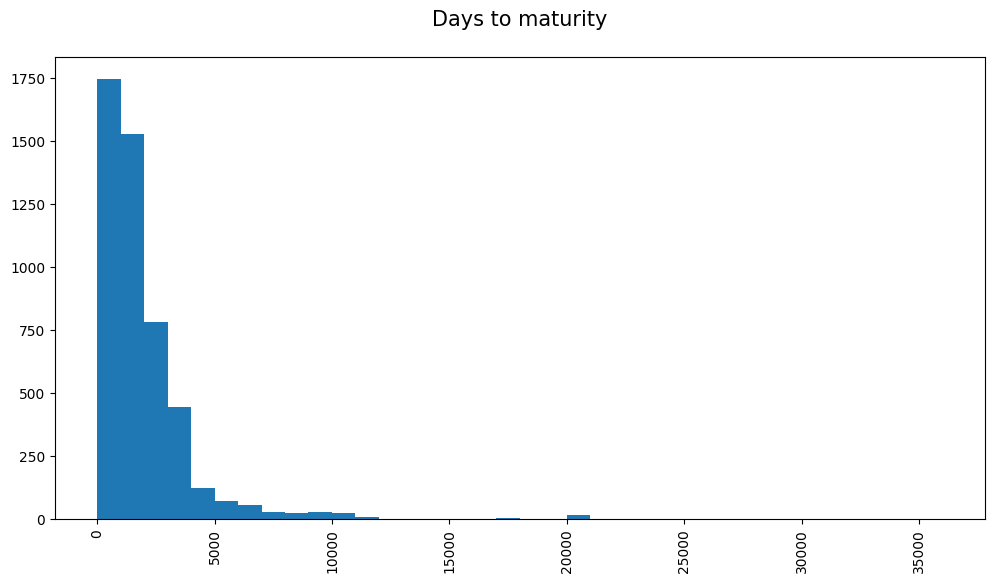

In [1080]:
# Histogram of the number of deals per company_short_name (top 20) with bins of size 50
df_unique_isin = df_preprocessed.groupby('ISIN').first()
plt.figure(figsize=(12, 6))
plt.hist(df_unique_isin['Days_to_Maturity'], bins=range(0, max(df_preprocessed['Days_to_Maturity']) + 1000, 1000))
plt.title('Days to maturity\n', fontsize=15)
plt.xticks(rotation=90)
plt.show()


G. **Fitch Credit rating**

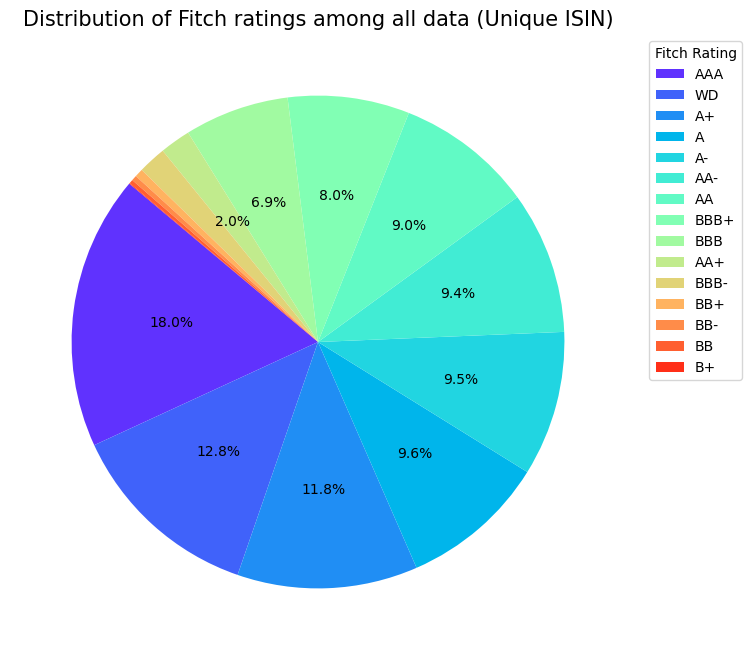

In [1081]:
# Group by unique 'ISIN' and keep the first row for each group
df_unique_isin = df_preprocessed.groupby('ISIN').first()

# Count the occurrences of each sector in the new DataFrame
sector_counts_unique_isin = df_unique_isin['Rating_Fitch'].value_counts()

# Plot the pie chart with the new DataFrame
colors = sns.color_palette('rainbow', len(sector_counts_unique_isin))

# Set the threshold for displaying percentages
percentage_threshold = 2
def autopct_func(pct):
    return f'{pct:.1f}%' if pct >= percentage_threshold else ''

# Plot the pie chart without labels
plt.figure(figsize=(10, 8))
plt.pie(sector_counts_unique_isin, labels=None, autopct=autopct_func, startangle=140, colors=colors)
plt.legend(sector_counts_unique_isin.index, title='Fitch Rating', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title('Distribution of Fitch ratings among all data (Unique ISIN)', fontsize=15)
plt.show()


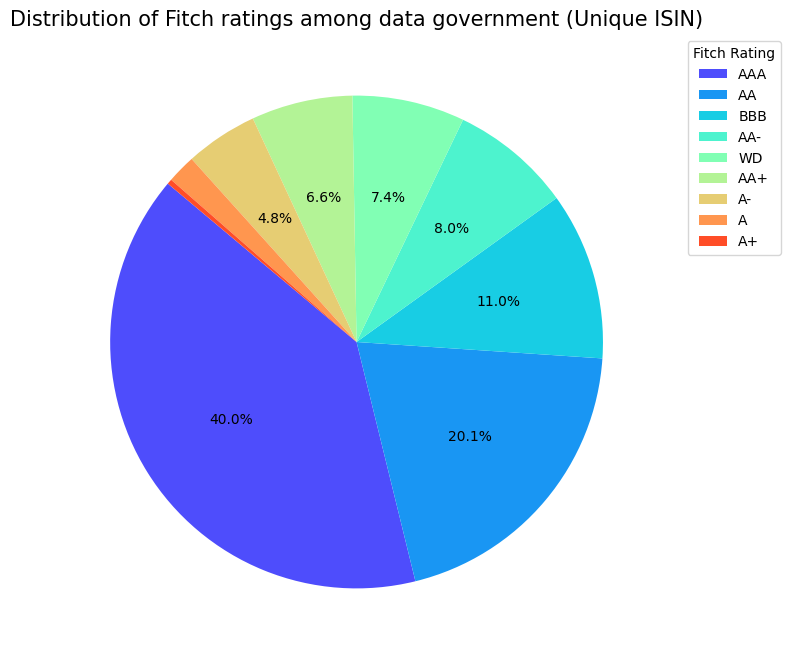

In [1082]:
# Group by unique 'ISIN' and keep the first row for each group
df_unique_isin = df_preprocessed.groupby('ISIN').first()

df_government = df_unique_isin[df_unique_isin['BloomIndustrySector']=='Government'].copy()

# Count the occurrences of each sector in the new DataFrame
sector_counts_unique_isin = df_government['Rating_Fitch'].value_counts()

# Plot the pie chart with the new DataFrame
colors = sns.color_palette('rainbow', len(sector_counts_unique_isin))

# Set the threshold for displaying percentages
percentage_threshold = 2
def autopct_func(pct):
    return f'{pct:.1f}%' if pct >= percentage_threshold else ''

# Plot the pie chart without labels
plt.figure(figsize=(10, 8))
plt.pie(sector_counts_unique_isin, labels=None, autopct=autopct_func, startangle=140, colors=colors)
plt.legend(sector_counts_unique_isin.index, title='Fitch Rating', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title('Distribution of Fitch ratings among data government (Unique ISIN)', fontsize=15)
plt.show()


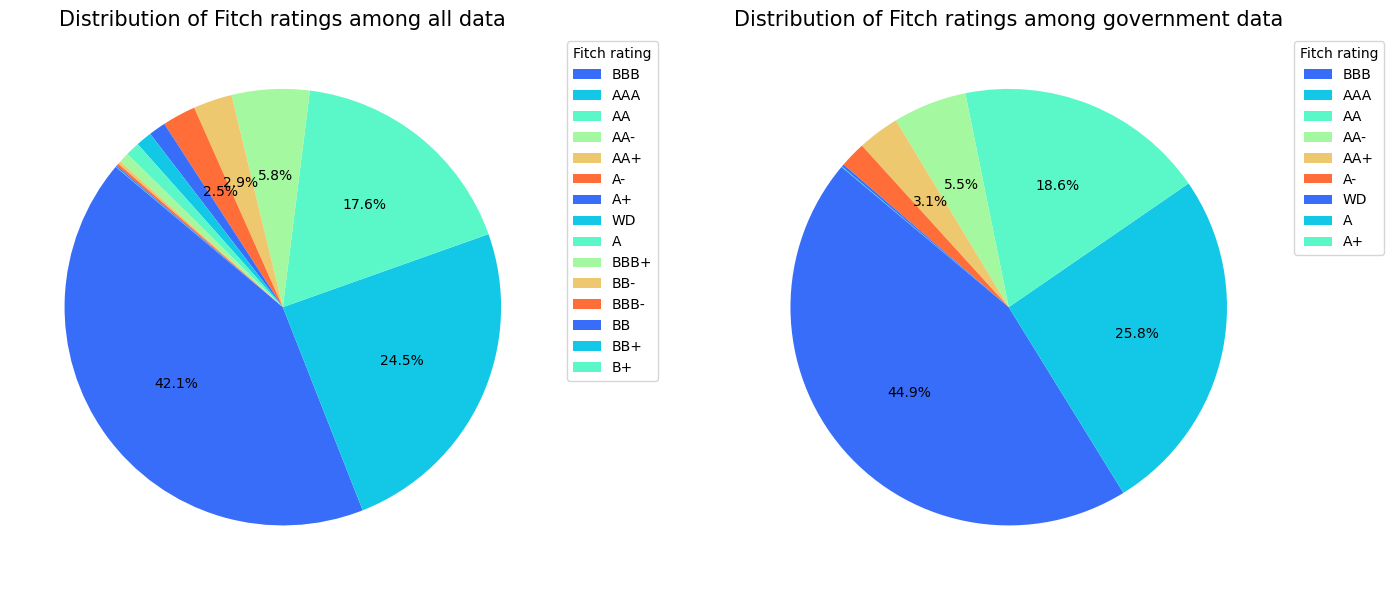

In [1083]:
# Set the common attributes
colors = sns.color_palette('rainbow')
percentage_threshold = 2
autopct_func = lambda pct: f'{pct:.1f}%' if pct >= percentage_threshold else ''

# Plot the pie chart for the entire dataset
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
Fitch_counts_all = df_preprocessed['Rating_Fitch'].value_counts()
plt.pie(Fitch_counts_all, labels=None, autopct=autopct_func, startangle=140, colors=colors)
plt.legend(Fitch_counts_all.index, title='Fitch rating', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title('Distribution of Fitch ratings among all data', fontsize=15)

# Plot the pie chart for the government data
plt.subplot(1, 2, 2)
df_government = df_preprocessed[df_preprocessed['BloomIndustrySector']=='Government'].copy()
Fitch_counts_government = df_government['Rating_Fitch'].value_counts()
plt.pie(Fitch_counts_government, labels=None, autopct=autopct_func, startangle=140, colors=colors)
plt.legend(Fitch_counts_government.index, title='Fitch rating', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title('Distribution of Fitch ratings among government data', fontsize=15)

# Adjust layout
plt.tight_layout()
plt.show()


In [1084]:
2.9+5.8+17.6+24.5

50.8

H. **Moodys Credit rating**

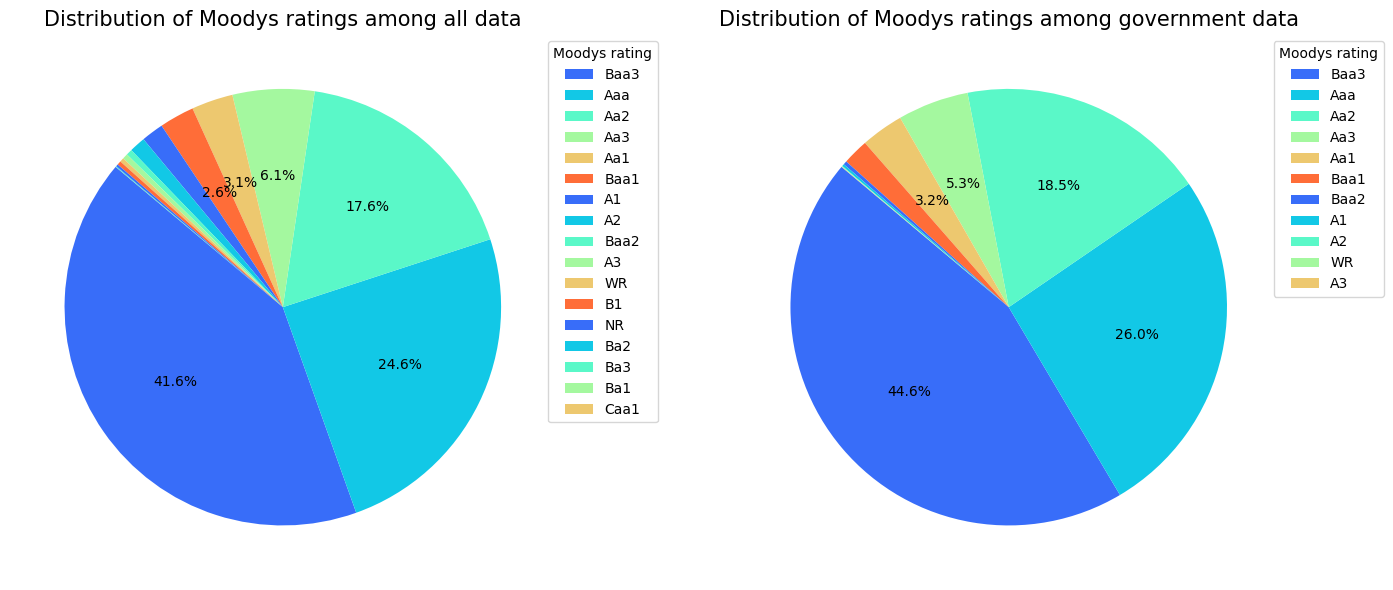

In [1085]:
# Set the common attributes
colors = sns.color_palette('rainbow')
percentage_threshold = 2
autopct_func = lambda pct: f'{pct:.1f}%' if pct >= percentage_threshold else ''

# Plot the pie chart for the entire dataset
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
moodys_counts_all = df_preprocessed['Rating_Moodys'].value_counts()
plt.pie(moodys_counts_all, labels=None, autopct=autopct_func, startangle=140, colors=colors)
plt.legend(moodys_counts_all.index, title='Moodys rating', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title('Distribution of Moodys ratings among all data', fontsize=15)

# Plot the pie chart for the government data
plt.subplot(1, 2, 2)
df_government = df_preprocessed[df_preprocessed['BloomIndustrySector']=='Government'].copy()
moodys_counts_all = df_government['Rating_Moodys'].value_counts()
plt.pie(moodys_counts_all, labels=None, autopct=autopct_func, startangle=140, colors=colors)
plt.legend(moodys_counts_all.index, title='Moodys rating', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title('Distribution of Moodys ratings among government data', fontsize=15)

# Adjust layout
plt.tight_layout()
plt.show()


I. **SP Credit rating**

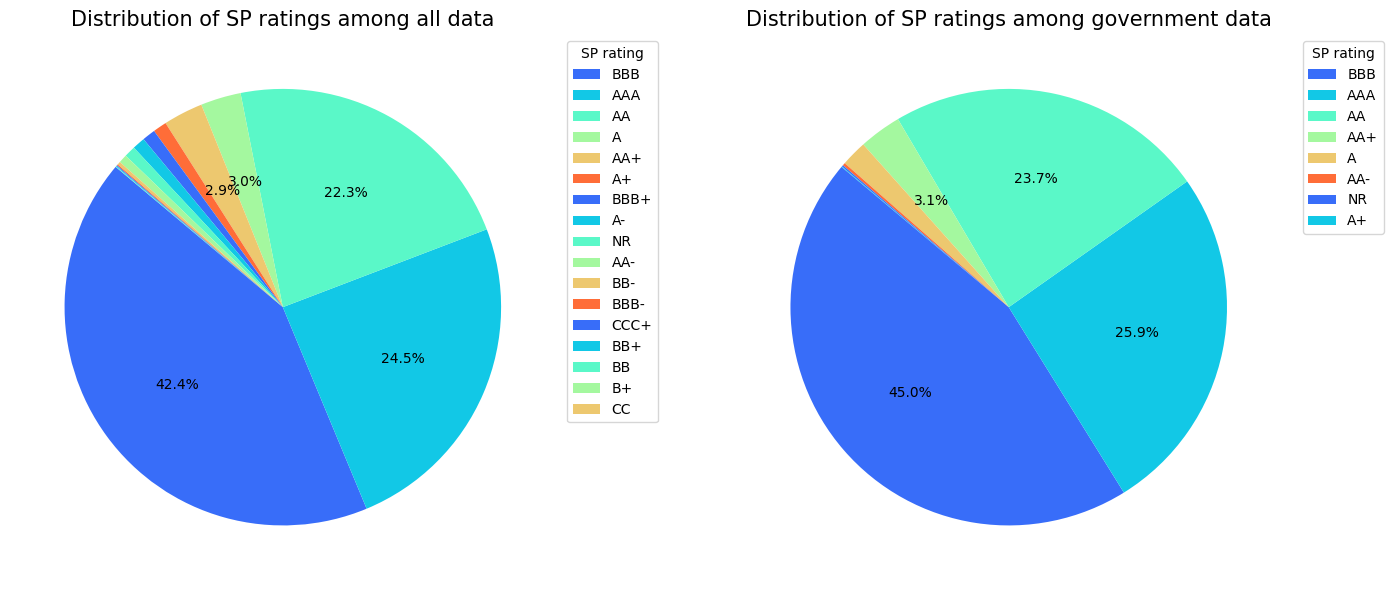

In [1086]:
# Set the common attributes
colors = sns.color_palette('rainbow')
percentage_threshold = 2
autopct_func = lambda pct: f'{pct:.1f}%' if pct >= percentage_threshold else ''

# Plot the pie chart for the entire dataset
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
moodys_counts_all = df_preprocessed['Rating_SP'].value_counts()
plt.pie(moodys_counts_all, labels=None, autopct=autopct_func, startangle=140, colors=colors)
plt.legend(moodys_counts_all.index, title='SP rating', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title('Distribution of SP ratings among all data', fontsize=15)

# Plot the pie chart for the government data
plt.subplot(1, 2, 2)
df_government = df_preprocessed[df_preprocessed['BloomIndustrySector']=='Government'].copy()
moodys_counts_all = df_government['Rating_SP'].value_counts()
plt.pie(moodys_counts_all, labels=None, autopct=autopct_func, startangle=140, colors=colors)
plt.legend(moodys_counts_all.index, title='SP rating', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title('Distribution of SP ratings among government data', fontsize=15)

# Adjust layout
plt.tight_layout()
plt.show()


J. **Currency analysis**

In [1087]:
# Count the occurrences of each currency
ccy_counts = df_preprocessed['Ccy'].value_counts()
print(ccy_counts)

Ccy
EUR    313093
USD      1624
GBP         1
Name: count, dtype: int64


In [1088]:
# Count the occurrences of each currency
ccy_counts = df_preprocessed['Ccy'].value_counts()
ccy_percentage = ccy_counts / len(df_preprocessed) * 100
print(ccy_percentage)

Ccy
EUR    99.483665
USD     0.516018
GBP     0.000318
Name: count, dtype: float64


The great majority of bonds (99.5%) are in euros.

K. **Bond Price analysis (B_price)**

In [1089]:
# Group by unique 'ISIN' and keep the first row for each group
df_unique_isin = df_preprocessed.groupby('ISIN').first()

df_EUR = df_unique_isin[df_unique_isin['Ccy']=='EUR']
df_EUR['B_Price'].describe()

count    4431.000000
mean       92.038140
std         9.564071
min        33.000000
25%        87.000000
50%        95.000000
75%        99.000000
max       137.000000
Name: B_Price, dtype: float64

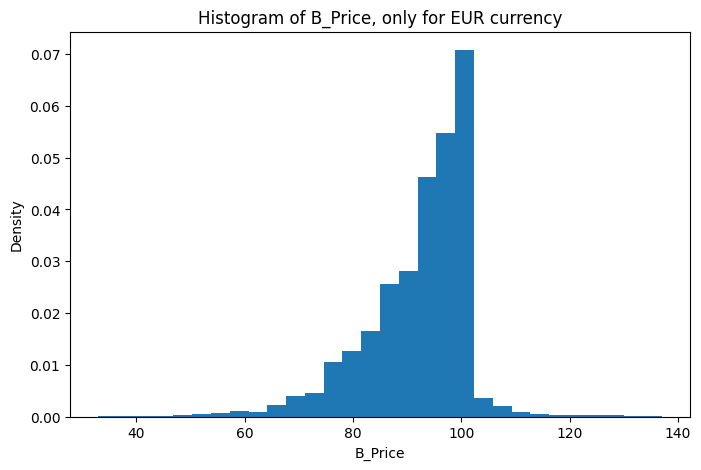

In [1090]:
plt.figure(figsize=(8, 5))
df_EUR['B_Price'].hist(bins=30, grid=False, density=True)
plt.title('Histogram of B_Price, only for EUR currency')
plt.xlabel('B_Price')
plt.ylabel('Density')
plt.show()


L. **Country analysis**

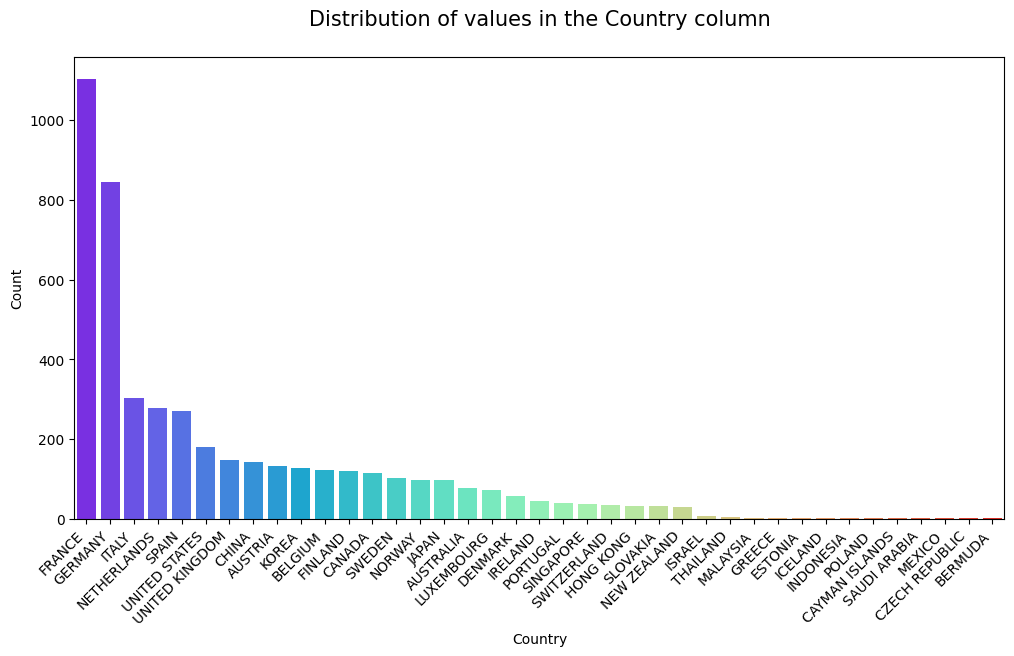

In [1091]:
df_unique_isin = df_preprocessed.groupby('ISIN').first()
country_counts = df_unique_isin['Country'].value_counts()

# Plot the bar chart for country columns
plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.index, y=country_counts, palette='rainbow')
plt.title('Distribution of values in the Country column\n', fontsize = 15)
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


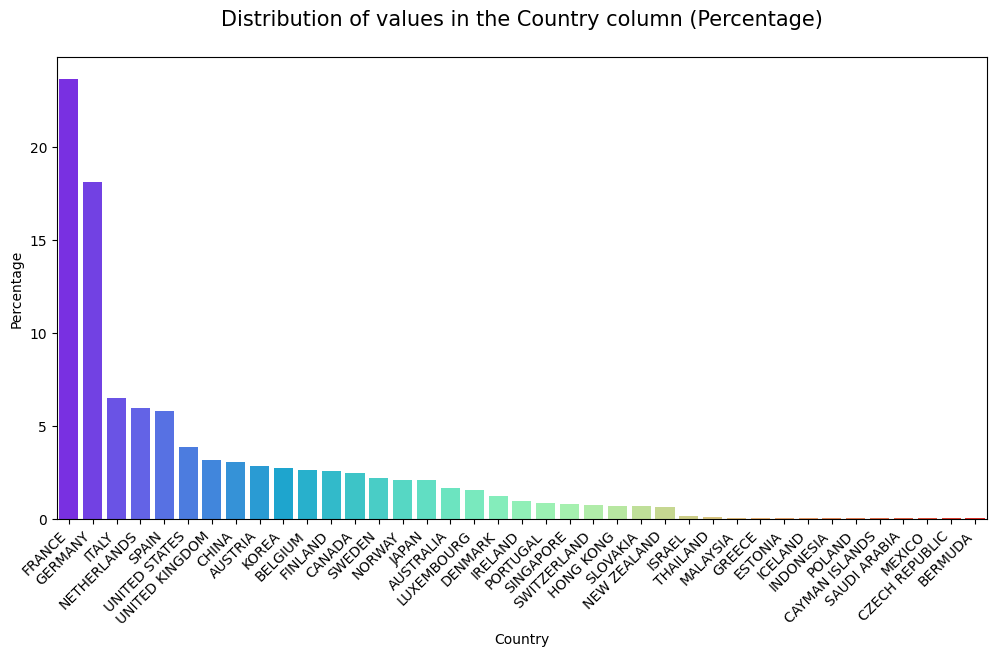

In [1092]:
# Calculate the percentage distribution
country_percentage = (country_counts / country_counts.sum()) * 100

# Plot the bar chart for country columns with percentages
plt.figure(figsize=(12, 6))
sns.barplot(x=country_percentage.index, y=country_percentage, palette='rainbow')
plt.title('Distribution of values in the Country column (Percentage)\n', fontsize = 15)
plt.xlabel('Country')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


In [1093]:
country_percentage.head(5)

Country
FRANCE         23.670669
GERMANY        18.117496
ITALY           6.518010
NETHERLANDS     5.960549
SPAIN           5.789022
Name: count, dtype: float64

The majority are Italian, French and German bonds.

M. **Coupon analysis**

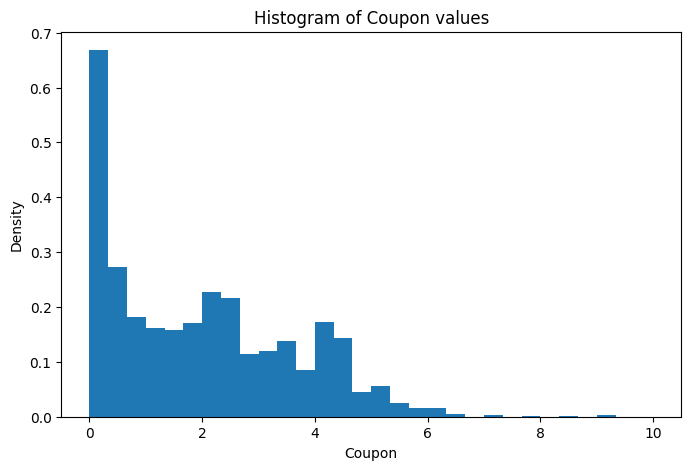

In [1094]:
plt.figure(figsize=(8, 5))
df_preprocessed['Coupon'].hist(bins=30, grid=False, density=True)
plt.title('Histogram of Coupon values')
plt.xlabel('Coupon')
plt.ylabel('Density')
plt.show()


In [1095]:
df_preprocessed.GSpreadMid.describe()

count    82800.000000
mean       103.841259
std         76.327224
min       -325.936432
25%         52.516930
50%         85.621807
75%        162.431858
max       4707.474609
Name: GSpreadMid, dtype: float64

## Exploring the heterogeneity of clients and bonds

- **Exploring the heterogeneity of clients** (p.13 of the thesis): most active client ? What is he accounting for among all performed RFQs ? Find something like '80% of the accounted RFQs were made by less than 10% of the client pool'. Plot the graph Cumulative propoertion of clients as a function of cumulative proportion of RFQs.


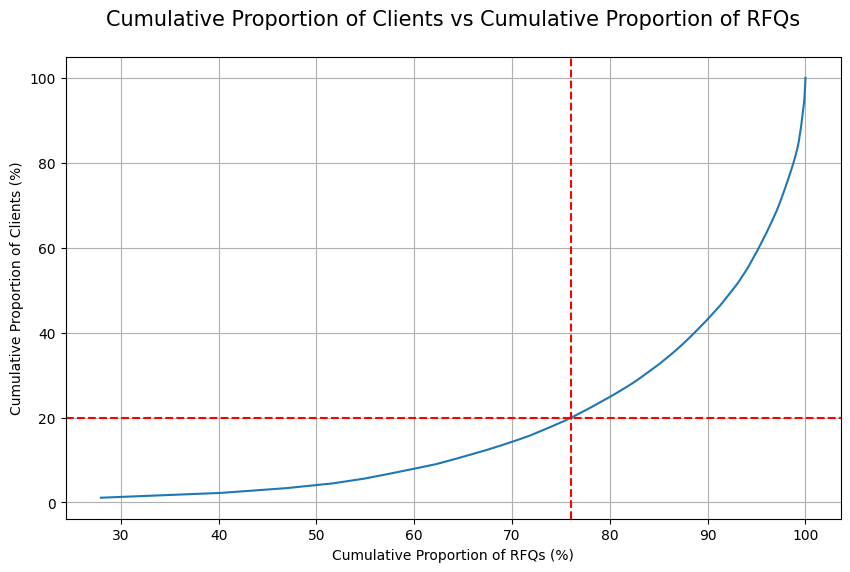

In [1096]:
# Generate the dataframe
df_clients = df_preprocessed[['ISIN', 'company_short_name']]
df_RFQ_count = df_clients.groupby(by='company_short_name').agg(count=('company_short_name','count')).reset_index()
df_RFQ_count.columns = ['company_short_name', 'RFQ_count']
total_RFQ_transactions = df_RFQ_count.RFQ_count.sum()
df_RFQ_count['RFQ_count_perc'] = df_RFQ_count['RFQ_count']*100/total_RFQ_transactions

df_RFQ_count.sort_values(by='RFQ_count', ascending=False, inplace=True)
df_RFQ_count['client_number'] = 1
df_RFQ_count['cum_sum_client'] = np.round(df_RFQ_count['client_number'].cumsum() * 100 /(df_RFQ_count.shape[0]), 2)
df_RFQ_count.drop(columns=['client_number'], inplace=True)
df_RFQ_count['cum_sum_RFQ'] = np.round(df_RFQ_count['RFQ_count_perc'].cumsum(), 2)

# Generate the plot
plt.figure(figsize=(10, 6))
plt.plot(df_RFQ_count['cum_sum_RFQ'], df_RFQ_count['cum_sum_client'], linestyle='-')
plt.title('Cumulative Proportion of Clients vs Cumulative Proportion of RFQs\n', fontsize=15)
plt.xlabel('Cumulative Proportion of RFQs (%)')
plt.ylabel('Cumulative Proportion of Clients (%)')
plt.axvline(x=76, color='red', linestyle='--') 
plt.axhline(y=20, color='red', linestyle='--') 
plt.grid(True)
plt.show()

In [1097]:
df_RFQ_count.head()

company_short_name  RFQ_count  RFQ_count_perc  \
86                      societe generale mer      87953       27.946606   
38                                  cegi ett      38541       12.246201   
48  credit agricole centre loire entreprises      21085        6.699649   
65                                      hsbc      14932        4.744565   
16                               bnp reunion      10283        3.267370   

    cum_sum_client  cum_sum_RFQ  
86            1.12        27.95  
38            2.25        40.19  
48            3.37        46.89  
65            4.49        51.64  
16            5.62        54.90

In [1098]:
df_RFQ_count[df_RFQ_count['cum_sum_client']>20].head()

company_short_name  RFQ_count  RFQ_count_perc  cum_sum_client  cum_sum_RFQ
88           somupaca       3154        1.002167           20.22        76.25
5            atradius       3045        0.967533           21.35        77.21
74               oseo       2899        0.921142           22.47        78.13
36               cegc       2763        0.877929           23.60        79.01
67    maitre bondroit       2756        0.875705           24.72        79.89

Observations regarding the heterogeneity of clients : 
- The **most active client** (societe generale mer) accounted for 27.95% of all performed RFQs alone 
- **76% of the accounted RFQs** were made by less of **20% of the client pool**


**Exploring the heterogeneity of bonds**  (p.13 of the thesis): % of bonds that are shared among several clients ? Find somthing like '80% of the RFQs were done on more than 30% of the considered assets.' Plot the cumulative number of assets as a function of the cumulative proportion of RFQs.

In [1099]:
df_bonds = df_preprocessed[['ISIN', 'cdcissuer']].copy()
df_bonds = df_bonds.groupby(by='ISIN').agg('count').reset_index()
df_bonds.columns= ['ISIN', 'count']
df_bonds.sort_values(by='count', ascending=False, inplace=True)
total_bond = df_preprocessed.shape[0]
df_bonds['count_perc'] = np.round(df_bonds['count']*100/total_bond, 2)
df_bonds.head()

ISIN  count  count_perc
2228  IT0003934657   8333        2.65
2346  IT0005441883   4212        1.34
2336  IT0005425233   4190        1.33
1806  FR0014001NN8   4033        1.28
2372  IT0005518128   3980        1.26

In [1100]:
df_bonds = df_preprocessed[['ISIN', 'cdcissuer']].copy()
df_bonds = df_bonds.groupby(by='cdcissuer').agg('count').reset_index()
df_bonds.columns = ['cdcissuer', 'count']
df_bonds.sort_values(by='count', ascending=False, inplace=True)
total_bond = df_preprocessed.shape[0]
df_bonds['count_perc'] = np.round(df_bonds['count']*100/total_bond, 2)
df_bonds.head()

cdcissuer   count  count_perc
123                                       BTP  129018       40.99
291       FRENCH REPUBLIC GOVERNMENT BOND OAT   51777       16.45
125  BUNDESREPUBLIK DEUTSCHLAND BUNDESANLEIHE   33257       10.57
378        KINGDOM OF BELGIUM GOVERNMENT BOND   15105        4.80
474               NETHERLANDS GOVERNMENT BOND   14467        4.60

First line where the cumulated sum of RFQs is higher than 80% :
ISIN                 BE0000333428
count_perc                   0.11
count_perc_cumsum           80.01
cum_sum_asset                5.23
Name: 88, dtype: object


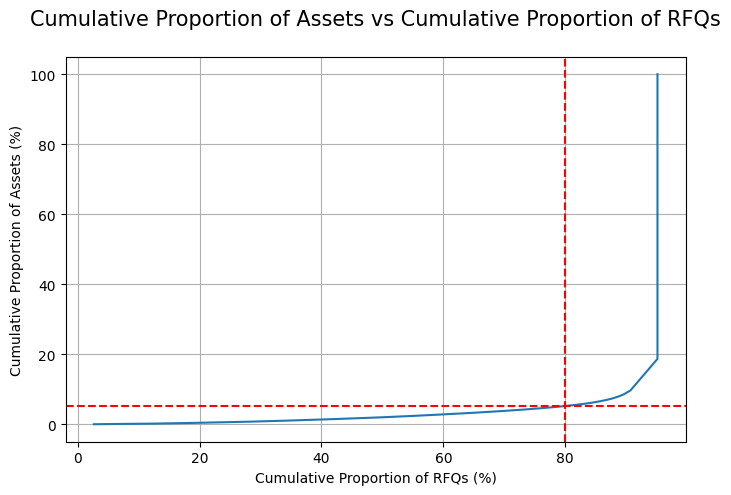

In [1101]:
df_bonds = df_preprocessed[['ISIN', 'cdcissuer']].copy()
df_bonds = df_bonds.groupby(by='ISIN').agg('count').reset_index()
df_bonds.columns= ['ISIN', 'count']
df_bonds.sort_values(by='count', ascending=False, inplace=True)
total_bond = df_preprocessed.shape[0]
df_bonds['count_perc'] = np.round(df_bonds['count']*100/total_bond, 2)
df_bonds['count_perc_cumsum'] = df_bonds['count_perc'].cumsum()

df_bonds['number_asset'] = 1
total_asset = df_bonds.shape[0]
df_bonds['cum_sum_asset'] = np.round(df_bonds['number_asset'].cumsum()*100/total_asset, 2)
df_bonds.drop(columns=['number_asset', 'count'], inplace=True)

print('First line where the cumulated sum of RFQs is higher than 80% :')
df_higher_20 = df_bonds[df_bonds['count_perc_cumsum']>80]
print(df_higher_20.iloc[0])

# Plot the histogram 
plt.figure(figsize=(8, 5))
plt.plot(df_bonds['count_perc_cumsum'], df_bonds['cum_sum_asset'], linestyle='-')
plt.title('Cumulative Proportion of Assets vs Cumulative Proportion of RFQs\n', fontsize=15)
plt.xlabel('Cumulative Proportion of RFQs (%)')
plt.ylabel('Cumulative Proportion of Assets (%)')
plt.axvline(x=80.01, color='red', linestyle='--') 
plt.axhline(y=5.23, color='red', linestyle='--') 
plt.grid(True)
plt.show()

Observations regarding the heterogeneity of bonds :
- The **most active bond** (ISIN : IT0003934657) accounted for 2.65% of the all RFQs
- The **most active bond issuer** (cdcissuer : BTP) accounted for 50% of all RFQs
- **80% of the RFQs** were done on a bit more than **5% of the considered assets**. The heterogeity of bonds is then well more pronounced that the heterogeity of clients.

**Conclusion :** Most clients only trade a handful of bonds, and most bonds are only traded by a handful of clients. This problemn is referred in the page 13/14 of the thesis as the **long tail problem** :

"It can consequently become diffcult to build recommender systems able to propose the entire asset pool to a given client, and reciprocally. This phenomenon is referred to in the literature as the long tail problem (Park and Tuzhilin, 2008), which refers to the fact that for most items, very few activity is recorded. Park and Tuzhilin (2008) proposes a way to tackle this by splitting the item pool in a head and tail parts and train models on each of these parts, the tail model being trained on clustered items. More broadly, the long tail is tackled by systems that favor diverse recommendations, i.e., recommendations that are made outside of the usual clients’ patterns."

## Writing EDA functions

### 1. Bond Analysis functions (given ISIN code)

On peut afficher : 
- L'évolution du prix du bond selon la deal_date
- L'évolution du days to maturity selon la deal_date
- Le nombre de transactions
- Répartition buyer and seller 
- Un diagramme montrant les clients qui achètent déjà ce bond 


In [1102]:
ISIN_ex1 = 'AT0000383864'
ISIN_ex2 = 'AT0000A04967'
ISIN_ex3 = 'AT0000A0DXC2'
ISIN_ex4 = 'AT0000A0U299'

A. General Info display

In [1103]:
def plot_double_general_info(df, ISIN1, ISIN2):
    # Filter DataFrame for ISIN1
    df_ISIN1 = df[df['ISIN'] == ISIN1].copy()
    df_ISIN1.sort_values(by='Deal_Date', inplace=True)
    
    # Filter DataFrame for ISIN2
    df_ISIN2 = df[df['ISIN'] == ISIN2].copy()
    df_ISIN2.sort_values(by='Deal_Date', inplace=True)

    # Check if the DataFrames are empty after filtering
    if df_ISIN1.empty or df_ISIN2.empty:
        return "No data found for the given ISINs."
    
    # Create a PrettyTable
    table = PrettyTable()
    table.field_names = ["ISIN code", "Country", "Issuer", 
                         "Sector", "Industry", "SubIndustry"
                         ]

    # Format the maturity date for ISIN1
    maturity_date1 = df_ISIN1.maturity.iloc[0].strftime("%Y-%m-%d %H:%M:%S")
    maturity_date1 = maturity_date1[:-9]  
    
    # Add data for ISIN1 to the PrettyTable
    table.add_row([df_ISIN1.ISIN.iloc[0],
                   df_ISIN1.Country.iloc[0],
                   df_ISIN1.cdcissuer.iloc[0],                
                   df_ISIN1.BloomIndustrySector.iloc[0],
                   df_ISIN1.BloomIndustryGroup.iloc[0],
                   df_ISIN1.BloomIndustrySubGroup.iloc[0],

    ])

    # Format the maturity date for ISIN2
    maturity_date2 = df_ISIN2.maturity.iloc[0].strftime("%Y-%m-%d %H:%M:%S")
    maturity_date2 = maturity_date2[:-9]  

    # Add data for ISIN2 to the PrettyTable
    table.add_row([df_ISIN2.ISIN.iloc[0],
                   df_ISIN2.Country.iloc[0],
                   df_ISIN2.cdcissuer.iloc[0],                
                   df_ISIN2.BloomIndustrySector.iloc[0],
                   df_ISIN1.BloomIndustryGroup.iloc[0],
                   df_ISIN1.BloomIndustrySubGroup.iloc[0],

    ])

    # Print the PrettyTable
    print(table)

# Example usage:
plot_double_general_info(df_preprocessed, ISIN_ex1, ISIN_ex2)


+--------------+---------+-------------------------------------+------------+-----------+-------------+
|  ISIN code   | Country |                Issuer               |   Sector   |  Industry | SubIndustry |
+--------------+---------+-------------------------------------+------------+-----------+-------------+
| AT0000383864 | AUSTRIA | REPUBLIC OF AUSTRIA GOVERNMENT BOND | Government | Sovereign |  Sovereign  |
| AT0000A04967 | AUSTRIA | REPUBLIC OF AUSTRIA GOVERNMENT BOND | Government | Sovereign |  Sovereign  |
+--------------+---------+-------------------------------------+------------+-----------+-------------+


In [1141]:
def plot_financial_info(df, ISIN1, ISIN2):
    # Filter DataFrame for ISIN1
    df_ISIN1 = df[df['ISIN'] == ISIN1].copy()
    df_ISIN1.sort_values(by='Deal_Date', inplace=True)
    
    # Filter DataFrame for ISIN2
    df_ISIN2 = df[df['ISIN'] == ISIN2].copy()
    df_ISIN2.sort_values(by='Deal_Date', inplace=True)

    # Check if the DataFrames are empty after filtering
    if df_ISIN1.empty or df_ISIN2.empty:
        return "No data found for the given ISINs."
    
    # Create a PrettyTable
    table = PrettyTable()
    table.field_names = ["ISIN code", "Mean Price", "Maturity", "Coupon", 
                         "Frequency", "Type"]

    # Format the maturity date for ISIN1
    maturity_date1 = df_ISIN1.maturity.iloc[0].strftime("%Y-%m-%d %H:%M:%S")
    maturity_date1 = maturity_date1[:-9]  
    currency1 = df_ISIN1.Ccy.iloc[0]
    
    # Add data for ISIN1 to the PrettyTable
    table.add_row([str(df_ISIN1.ISIN.iloc[0]) + ' (Initial)',
                   str(np.round(df_ISIN1.B_Price.mean(), 2)) + f' ({currency1})',
                   maturity_date1,
                   np.round(df_ISIN1.Coupon.iloc[0], 2),
                   df_ISIN1.Frequency.iloc[0],
                   df_ISIN1.Type.iloc[0],                   
    ])

    # Format the maturity date for ISIN2
    maturity_date2 = df_ISIN2.maturity.iloc[0].strftime("%Y-%m-%d %H:%M:%S")
    maturity_date2 = maturity_date2[:-9]  
    currency2 = df_ISIN2.Ccy.iloc[0]

    # Add data for ISIN2 to the PrettyTable
    table.add_row([str(df_ISIN2.ISIN.iloc[0]) + ' (Recommended)',
                   str(np.round(df_ISIN2.B_Price.mean(), 2)) + f' ({currency2})',
                   maturity_date2,
                   np.round(df_ISIN2.Coupon.iloc[0], 2),
                   df_ISIN2.Frequency.iloc[0],
                   df_ISIN2.Type.iloc[0],                       
    ])

    # Print the PrettyTable
    print(table)

# Example usage:
plot_financial_info(df_preprocessed, ISIN_ex1, ISIN_ex2)

+----------------------------+--------------+------------+--------+-----------+-------+
|         ISIN code          |  Mean Price  |  Maturity  | Coupon | Frequency |  Type |
+----------------------------+--------------+------------+--------+-----------+-------+
|   AT0000383864 (Initial)   | 112.82 (EUR) | 2027-07-15 |  6.25  |     12    | Fixed |
| AT0000A04967 (Recommended) | 111.63 (EUR) | 2037-03-15 |  4.15  |     12    | Fixed |
+----------------------------+--------------+------------+--------+-----------+-------+


B. **Bond Price evolution** as a function of the deal date

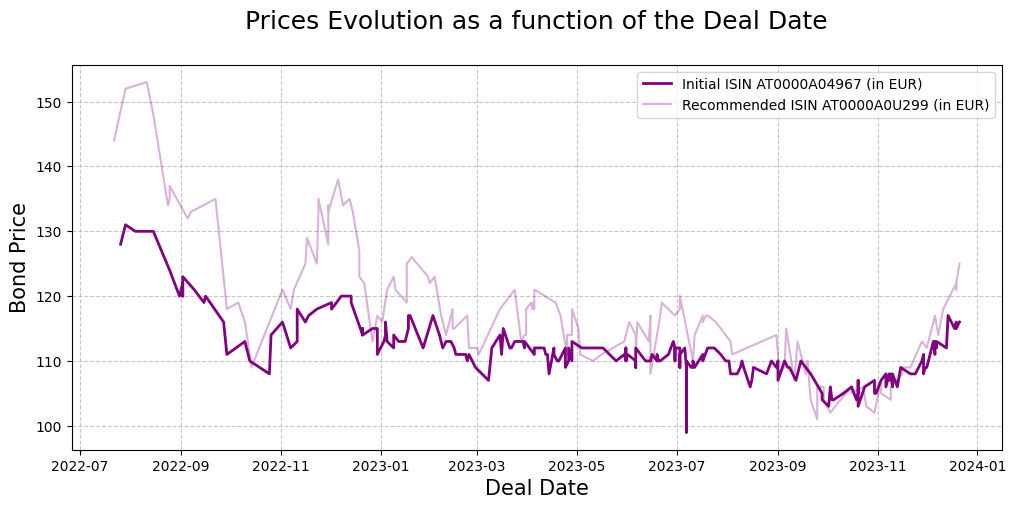

In [1139]:
def plot_double_price_evolution(df, ISIN1, ISIN2):
    """
    Plots the price evolution of a bond over its deal dates.

    Parameters:
    - df (DataFrame): The DataFrame containing bond data.
    - ISIN (str): The International Securities Identification Number of the bond.

    Returns:
    None
    """
    # Process the dataframe
    df_ISIN1 = df[df['ISIN'] == ISIN1].copy()
    df_ISIN1.sort_values(by='Deal_Date', inplace=True)

    df_ISIN2 = df[df['ISIN'] == ISIN2].copy()
    df_ISIN2.sort_values(by='Deal_Date', inplace=True)

    # Plot the figure with violet color scheme
    plt.figure(figsize=(12, 5))
    df_ISIN1_currency = df_ISIN1.iloc[0].Ccy
    df_ISIN2_currency = df_ISIN2.iloc[0].Ccy
    plt.plot(df_ISIN1['Deal_Date'], df_ISIN1['B_Price'], color='purple', linestyle='-', linewidth=2, label=f'Initial ISIN {ISIN1} (in {df_ISIN1_currency})')
    plt.plot(df_ISIN2['Deal_Date'], df_ISIN2['B_Price'], color='purple', alpha=0.3, linestyle='-', markersize=4, label=f'Recommended ISIN {ISIN2} (in {df_ISIN2_currency})')
    plt.xlabel('Deal Date', fontsize=15)
    plt.ylabel(f'Bond Price', fontsize=15)
    plt.title(f'Prices Evolution as a function of the Deal Date\n', fontsize=18)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7) 
    plt.show()

# Example usage:
ISIN_ex1 = 'AT0000383864'
plot_double_price_evolution(df_preprocessed, ISIN_ex2, ISIN_ex4)

C. Display of the grades comparision

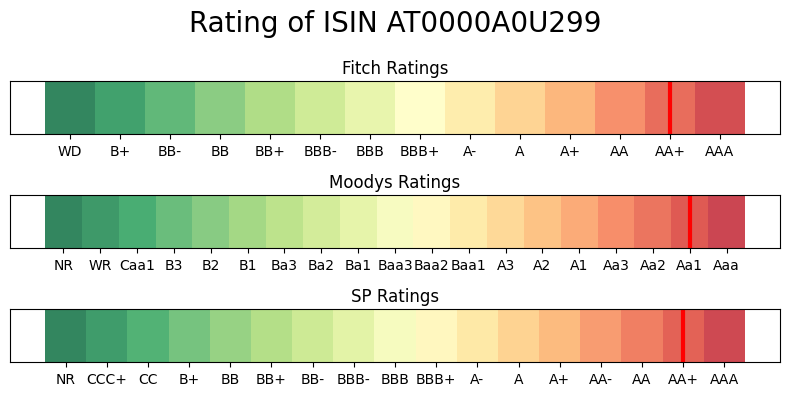

In [1156]:
def plot_triple_vertical_gauges(df, ISIN):
    # Dataframe for the specified ISIN
    df_ISIN = df[df['ISIN'] == ISIN]

    sorted_fitch_ratings = ['WD', 'B+', 'BB-', 'BB', 'BB+', 'BBB-', 'BBB', 'BBB+', 'A-', 'A', 'A+', 'AA', 'AA+', 'AAA']
    sorted_moodys_ratings = ['NR', 'WR', 'Caa1', 'B3', 'B2', 'B1', 'Ba3', 'Ba2', 'Ba1', 'Baa3', 'Baa2', 'Baa1', 'A3', 'A2', 'A1', 'Aa3', 'Aa2', 'Aa1', 'Aaa']
    sorted_sp_ratings = ['NR', 'CCC+', 'CC', 'B+', 'BB', 'BB+', 'BB-', 'BBB-', 'BBB', 'BBB+', 'A-', 'A', 'A+', 'AA-', 'AA', 'AA+', 'AAA']

    # Create a figure and axes
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 4))

    # Plot for Fitch
    cmap_fitch = plt.get_cmap('RdYlGn_r')
    colors_fitch = [cmap_fitch(i / len(sorted_fitch_ratings)) for i in range(len(sorted_fitch_ratings))]
    grade_fitch = df_ISIN['Rating_Fitch'].iloc[0]

    for i, rating in enumerate(sorted_fitch_ratings):
        ax1.axvspan(i, i + 1, facecolor=colors_fitch[i], alpha=0.8)

    if grade_fitch and grade_fitch in sorted_fitch_ratings:
        grade_index_fitch = sorted_fitch_ratings.index(grade_fitch)
        ax1.axvline(x=grade_index_fitch + 0.5, color='red', linestyle='-', linewidth=3)

    ax1.set_xticks(np.arange(len(sorted_fitch_ratings)) + 0.5)
    ax1.set_xticklabels(sorted_fitch_ratings)
    ax1.set_yticks([])
    ax1.set_aspect('auto')
    ax1.set_title(f'Fitch Ratings')

    # Plot for Moodys
    cmap_moodys = plt.get_cmap('RdYlGn_r')
    colors_moodys = [cmap_moodys(i / len(sorted_moodys_ratings)) for i in range(len(sorted_moodys_ratings))]
    grade_moodys = df_ISIN['Rating_Moodys'].iloc(0)

    for i, rating in enumerate(sorted_moodys_ratings):
        ax2.axvspan(i, i + 1, facecolor=colors_moodys[i], alpha=0.8)

    if grade_moodys and grade_moodys[0] in sorted_moodys_ratings:
        grade_index_moodys = sorted_moodys_ratings.index(grade_moodys[0])
        ax2.axvline(x=grade_index_moodys + 0.5, color='red', linestyle='-', linewidth=3)

    ax2.set_xticks(np.arange(len(sorted_moodys_ratings)) + 0.5)
    ax2.set_xticklabels(sorted_moodys_ratings)
    ax2.set_yticks([])
    ax2.set_aspect('auto')
    ax2.set_title(f'Moodys Ratings')

    # Plot for SP
    cmap_sp = plt.get_cmap('RdYlGn_r')
    colors_sp = [cmap_sp(i / len(sorted_sp_ratings)) for i in range(len(sorted_sp_ratings))]
    grade_sp = df_ISIN['Rating_SP'].iloc[0]

    for i, rating in enumerate(sorted_sp_ratings):
        ax3.axvspan(i, i + 1, facecolor=colors_sp[i], alpha=0.8)

    if grade_sp and grade_sp in sorted_sp_ratings:
        grade_index_sp = sorted_sp_ratings.index(grade_sp)
        ax3.axvline(x=grade_index_sp + 0.5, color='red', linestyle='-', linewidth=3)

    ax3.set_xticks(np.arange(len(sorted_sp_ratings)) + 0.5)
    ax3.set_xticklabels(sorted_sp_ratings)
    ax3.set_yticks([])
    ax3.set_aspect('auto')
    ax3.set_title(f'SP Ratings')

    plt.suptitle(f'Rating of ISIN {ISIN}', fontsize=20)

    plt.tight_layout()
    plt.show()

# Run
plot_triple_vertical_gauges(df_preprocessed, ISIN_ex4)


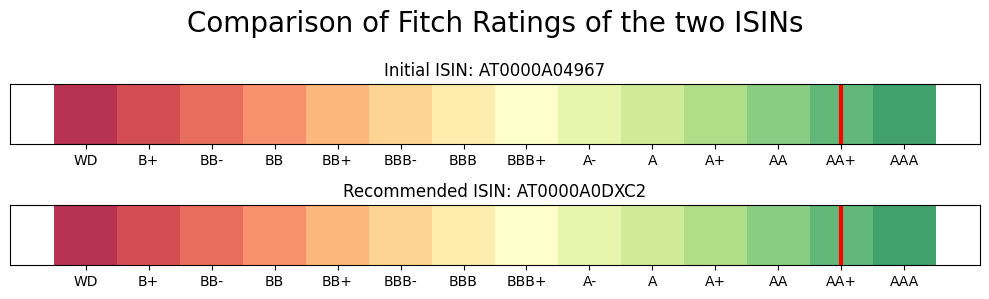

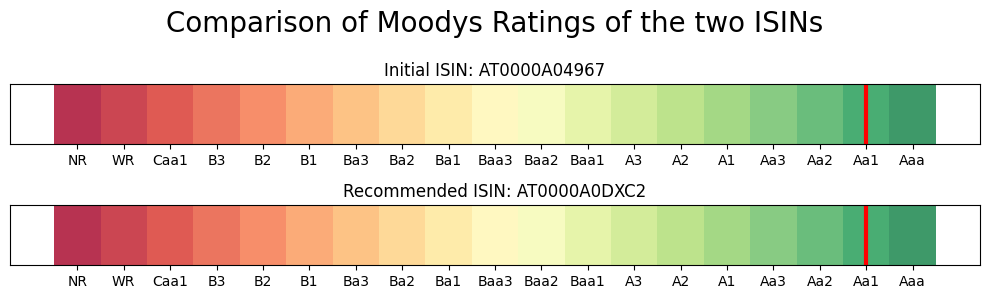

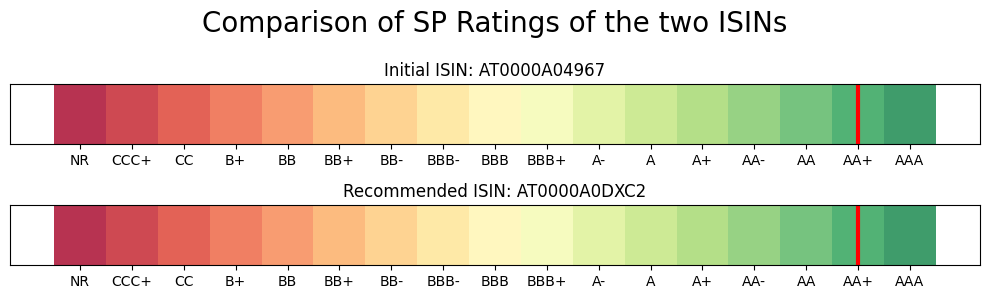

In [1144]:
def plot_double_horizontal_gauges(df, ISIN1, ISIN2, rating_name='Fitch'):
    # Dataframes for both ISINs
    df_ISIN1 = df[df['ISIN'] == ISIN1]
    df_ISIN2 = df[df['ISIN'] == ISIN2]

    if rating_name == 'Fitch':
        sorted_ratings = ['WD', 'B+', 'BB-', 'BB', 'BB+', 'BBB-', 'BBB', 'BBB+', 'A-', 'A', 'A+', 'AA', 'AA+', 'AAA']
        grade1 = df_ISIN1.Rating_Fitch.iloc[0]
        grade2 = df_ISIN2.Rating_Fitch.iloc[0]

    if rating_name == 'Moodys':
        sorted_ratings = ['NR', 'WR', 'Caa1', 'B3', 'B2', 'B1', 'Ba3', 'Ba2', 'Ba1', 'Baa3', 'Baa2', 'Baa1', 'A3', 'A2', 'A1', 'Aa3', 'Aa2', 'Aa1', 'Aaa']
        grade1 = df_ISIN1.Rating_Moodys.iloc[0]
        grade2 = df_ISIN2.Rating_Moodys.iloc[0]

    if rating_name == 'SP':
        sorted_ratings = ['NR', 'CCC+', 'CC', 'B+', 'BB', 'BB+', 'BB-', 'BBB-', 'BBB', 'BBB+', 'A-', 'A', 'A+', 'AA-', 'AA', 'AA+', 'AAA']
        grade1 = df_ISIN1.Rating_SP.iloc[0]
        grade2 = df_ISIN2.Rating_SP.iloc[0]

    # Create a figure and axes
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 3))

    # Plot for ISIN1
    cmap = plt.get_cmap('RdYlGn')  # Modified colormap for red to green gradient
    colors1 = [cmap(i / len(sorted_ratings)) for i in range(len(sorted_ratings))]
    for i, rating in enumerate(sorted_ratings):
        ax1.axvspan(i, i + 1, facecolor=colors1[i], alpha=0.8)

    if grade1 and grade1 in sorted_ratings:
        grade_index1 = sorted_ratings.index(grade1)
        ax1.axvline(x=grade_index1 + 0.5, color='red', linestyle='-', linewidth=3)

    ax1.set_xticks(np.arange(len(sorted_ratings)) + 0.5)
    ax1.set_xticklabels(sorted_ratings)
    ax1.set_yticks([])
    ax1.set_aspect('auto')
    ax1.set_title(f'Initial ISIN: {ISIN1}')

    # Plot for ISIN2
    colors2 = [cmap(i / len(sorted_ratings)) for i in range(len(sorted_ratings))]
    for i, rating in enumerate(sorted_ratings):
        ax2.axvspan(i, i + 1, facecolor=colors2[i], alpha=0.8)

    if grade2 and grade2 in sorted_ratings:
        grade_index2 = sorted_ratings.index(grade2)
        ax2.axvline(x=grade_index2 + 0.5, color='red', linestyle='-', linewidth=3)

    ax2.set_xticks(np.arange(len(sorted_ratings)) + 0.5)
    ax2.set_xticklabels(sorted_ratings)
    ax2.set_yticks([])
    ax2.set_aspect('auto')
    ax2.set_title(f'Recommended ISIN: {ISIN2}')
    plt.suptitle(f'Comparison of {rating_name} Ratings of the two ISINs', fontsize=20)
    plt.tight_layout()
    plt.show()

# Run
plot_double_horizontal_gauges(df_preprocessed, ISIN_ex2, ISIN_ex3, rating_name='Fitch')
plot_double_horizontal_gauges(df_preprocessed, ISIN_ex2, ISIN_ex3, rating_name='Moodys')
plot_double_horizontal_gauges(df_preprocessed, ISIN_ex2, ISIN_ex3, rating_name='SP')


E. Display the clients repartition 

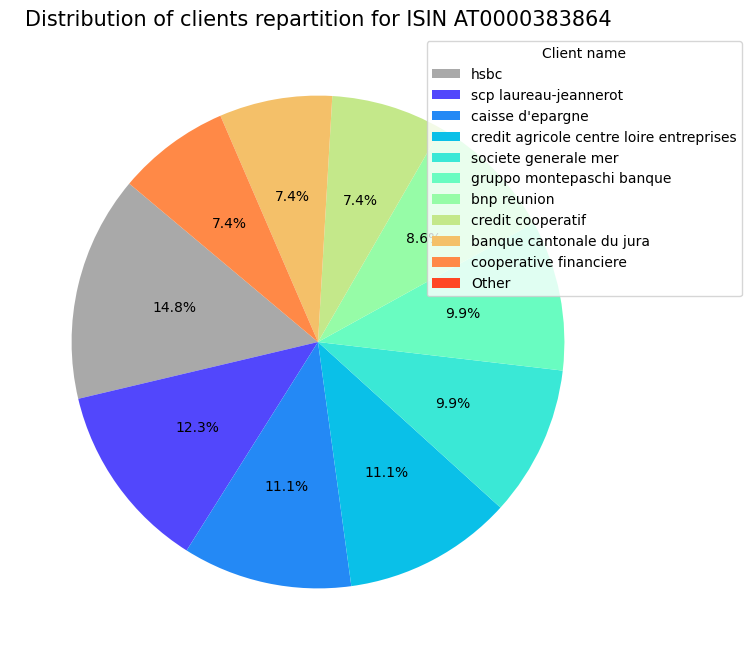

In [1163]:
df_ISIN = df_preprocessed[df_preprocessed['ISIN'] == ISIN_ex1].copy()
clien_unique_count = df_ISIN['company_short_name'].value_counts()

# Set the threshold for grouping into 'Others'
percentage_threshold = 5
mask = (clien_unique_count / clien_unique_count.sum() * 100) < percentage_threshold
clien_unique_count[mask] = clien_unique_count[mask].sum()
clien_unique_count = clien_unique_count[~mask]
clien_unique_count['Other'] = clien_unique_count[mask].sum()

# Plot the pie chart with the new DataFrame
colors = sns.color_palette(['#A9A9A9'] + sns.color_palette('rainbow', len(clien_unique_count)-1))

# Set the threshold for displaying percentages
def autopct_func(pct):
    return f'{pct:.1f}%' if pct >= percentage_threshold else ''

# Plot the pie chart without labels
plt.figure(figsize=(10, 8))
plt.pie(clien_unique_count, labels=None, autopct=autopct_func, startangle=140, colors=colors)
plt.legend(clien_unique_count.index, title='Client name', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title(f'Distribution of clients repartition for ISIN {ISIN_ex1}', fontsize=15)
plt.show()


F. Other numerical values display as a function of the deal date

In [1218]:
def plot_double_GSpreadMid_evolution(df, ISIN1, ISIN2, column='MidYTM'):
    """
    Plots the evolution of the 'column' value of a bond over its deal dates.

    Parameters:
    - df (DataFrame): The DataFrame containing bond data.
    - ISIN (str): The International Securities Identification Number of the bond.

    Returns:
    None
    """
    # Process the dataframe
    df_ISIN1 = df[df['ISIN'] == ISIN1].copy()
    df_ISIN1.sort_values(by='Deal_Date', inplace=True)

    df_ISIN2 = df[df['ISIN'] == ISIN2].copy()
    df_ISIN2.sort_values(by='Deal_Date', inplace=True)

    # Plot the figure with violet color scheme
    plt.figure(figsize=(8, 3))
    plt.plot(df_ISIN1['Deal_Date'], df_ISIN1[column], color='purple', linestyle='-', linewidth=2, label=f'Initial ISIN {ISIN1}')
    plt.plot(df_ISIN2['Deal_Date'], df_ISIN2[column], color='purple', alpha=0.3, linestyle='-', markersize=4, label=f'Recommended ISIN {ISIN2}')
    plt.xlabel('Deal Date', fontsize=12)
    plt.ylabel(f'{column}', fontsize=12)
    plt.title(f'{column} as a function of the Deal Date\n', fontsize=18)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7) 
    plt.show()

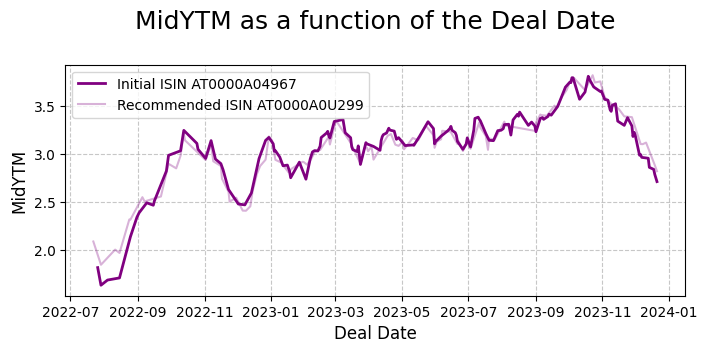

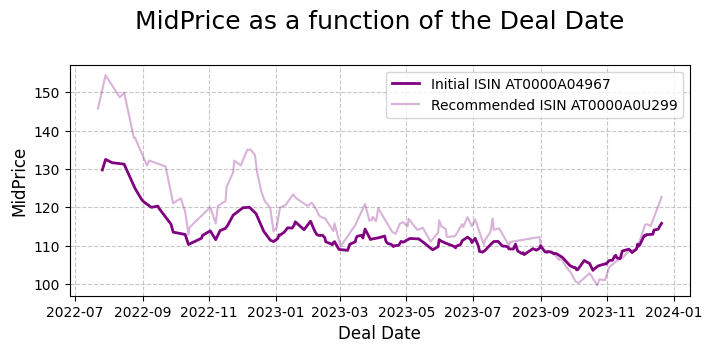

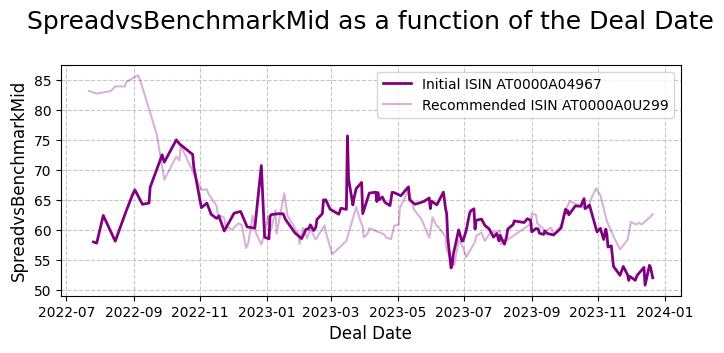

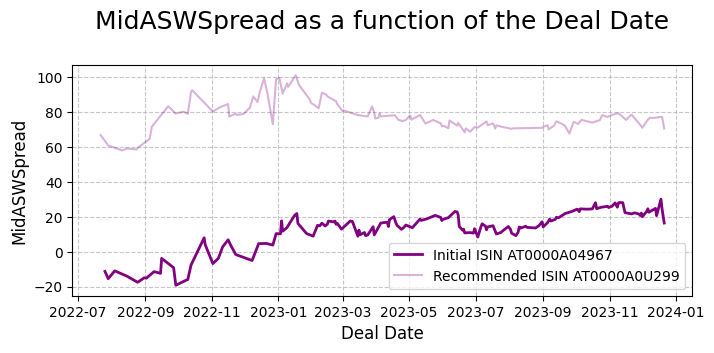

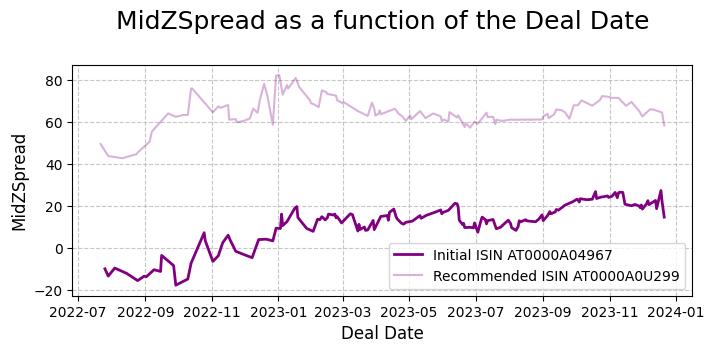

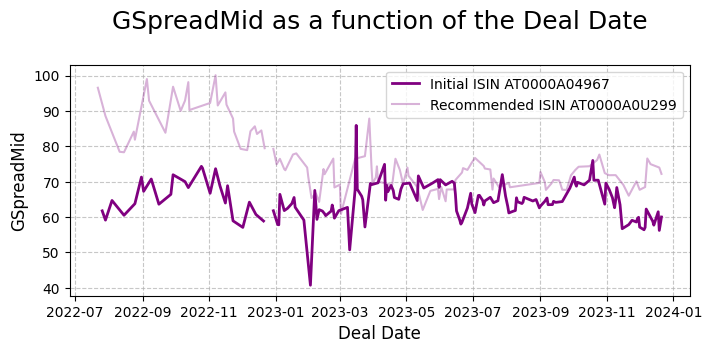

In [1219]:
# Run this function
columns_to_compare = ['MidYTM', 'MidPrice', 'SpreadvsBenchmarkMid', 'MidASWSpread',
                      'MidZSpread', 'GSpreadMid']

for feature in columns_to_compare :
    plot_double_GSpreadMid_evolution(df_preprocessed, ISIN_ex2, ISIN_ex4, column=feature) 